<a href="https://colab.research.google.com/github/ryuseunghan/AI-ML_Competition/blob/main/FIELD_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/FIELD_CAMP/data.csv')
data.head()

,수요지 id,X,Y,초등학령인구
0,C1,126.371505,37.463782,1
1,C2,126.479505,37.495782,46
2,C3,126.481505,37.499782,36
3,C4,126.482505,37.495782,81
4,C5,126.483505,37.497782,25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수요지 id  311 non-null    object 
 1   X       311 non-null    float64
 2   Y       311 non-null    float64
 3   초등학령인구  311 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 9.8+ KB


In [ ]:
data.rename(columns={'수요지 id': 'id','초등학령인구':'population'}, inplace=True)

In [ ]:
data.describe()

,X,Y,population
count,311.000000,311.000000,311.000000
mean,126.598711,37.481310,32.832797
std,0.054141,0.012754,64.606084
min,126.371505,37.446782,1.000000
25%,126.554505,37.472782,2.000000
50%,126.626505,37.479782,6.000000
75%,126.634505,37.487782,28.000000
max,126.652505,37.514782,400.000000


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


# Select only the 'x좌표' and 'y좌표' columns for clustering
X = data[['X', 'Y', 'population']]

# Perform hierarchical clustering with linkage type 'ward' (other options: 'single', 'complete', 'average')
# and n_clusters=None to allow the algorithm to determine the optimal number of clusters
clustering = AgglomerativeClustering(linkage='ward', n_clusters=2)
cluster_labels = clustering.fit_predict(X)

# Add the cluster labels to the DataFrame
data['cluster'] = cluster_labels

# cluster 별 초등학령인구 재계산
grouped_clusters = data.groupby('cluster').agg({'id': list, 'population': 'sum'})
print(grouped_clusters)

                                                        id  population
cluster                                                               
0        [C4, C24, C25, C26, C27, C28, C29, C30, C33, C...        7011
1        [C1, C2, C3, C5, C6, C7, C8, C9, C10, C11, C12...        3200


### data

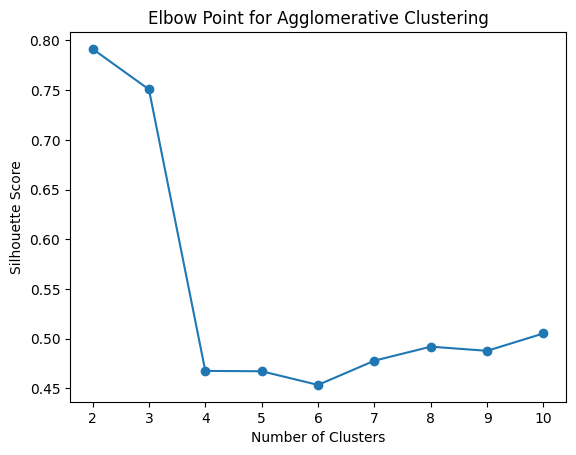

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#accumulative clustering
cluster_range = range(2, 11)
silhouette_scores = []
X = data[['X', 'Y']]

# Perform clustering for each cluster number and record the silhouette score
for num_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot the elbow point graph
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Point for Agglomerative Clustering')
plt.show()


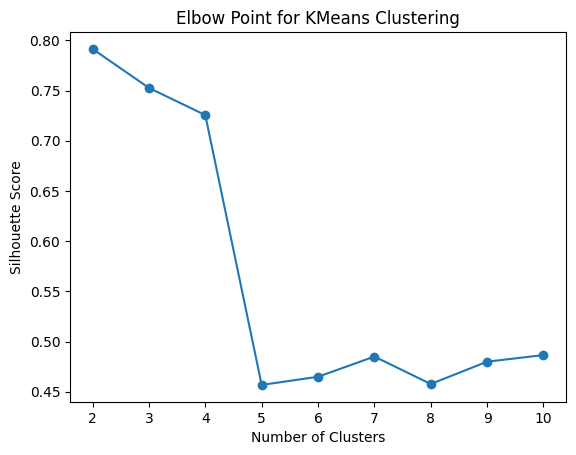

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#kmeans clustering
cluster_range = range(2, 11)
silhouette_scores = []
X = data[['X', 'Y']]

# Perform clustering for each cluster number and record the silhouette score
for num_clusters in cluster_range:
    clustering = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
    cluster_labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot the elbow point graph
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Point for KMeans Clustering')
plt.show()

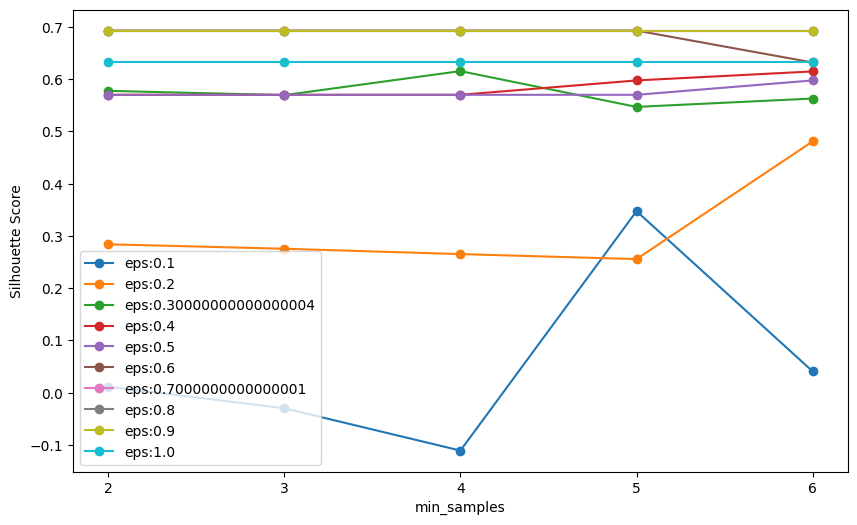

Best Silhouette Score: 0.6928640382060396
Best Parameters: {'eps': 0.6, 'min_samples': 2}
sil scores: [[0.011513718654700269, -0.029934150152362587, -0.11091492700922474, 0.34727978728578934, 0.04057350464751638], [0.28388629720173975, 0.27533948263390023, 0.26512927763575833, 0.25555337193489464, 0.4808406347472861], [0.577538323021741, 0.569352480452366, 0.6153061540460936, 0.5467948151773157, 0.5628083139933804], [0.5699283509213122, 0.5699283509213122, 0.5699283509213122, 0.5974462175595572, 0.6146961813388039], [0.5699283509213122, 0.5699283509213122, 0.5699283509213122, 0.5699283509213122, 0.5974462175595572], [0.6928640382060396, 0.6928640382060396, 0.6928640382060396, 0.6928640382060396, 0.6317921253278366], [0.6928640382060396, 0.6928640382060396, 0.6928640382060396, 0.6928640382060396, 0.6928640382060396], [0.6928640382060396, 0.6928640382060396, 0.6928640382060396, 0.6928640382060396, 0.6928640382060396], [0.6928640382060396, 0.6928640382060396, 0.6928640382060396, 0.6928640

In [ ]:
#진수님 코드
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['X', 'Y']])
dbscan = DBSCAN(min_samples=2)
dbscan.fit(scaled_data)

# eps_list1 = [0.05, 0.1, 0.5, 0.7, 1.0,1.25,1.5,2]
eps_list = np.arange(0.1, 1.1,0.1)
min_samples_list = [2,3,4,5,6]
# np.arange(0.1, 1,0.05)
# 계산한 silhouette score를 저장할 리스트
sil_scores = []
best_score=0
best_params={}
# eps와 min_samples를 바꿔가며 silhouette score 계산
for eps in eps_list:
    sil_scores_n=[]
    for min_samples in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(scaled_data)
        if len(set(cluster_labels)) > 1:
            cluster_labels[cluster_labels == -1] = len(set(cluster_labels))
            score = silhouette_score(scaled_data, cluster_labels)

            sil_scores_n.append(score)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples':min_samples}
        else:
            sil_scores_n.append(-1)  # 클러스터가 하나 이하인 경우는 silhouette score를 -1로 처리
    sil_scores.append(sil_scores_n)

# 계산한 silhouette score로 elbow point 그래프 그리기
scores_2d = np.array(sil_scores).reshape(len(eps_list), len(min_samples_list))
plt.figure(figsize=(10, 6))
for i, eps in enumerate(eps_list):
    plt.plot(min_samples_list, scores_2d[i], 'o-', label='eps: {}'.format(eps))
plt.xticks(min_samples_list)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend(['eps:{}'.format(eps) for eps in eps_list])
plt.show()

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)
print("sil scores:", sil_scores)

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV



param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'min_samples': [1, 2, 3, 4, 5, 10, 15, 20]
}

dbscan = DBSCAN()

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(X, labels)
        return silhouette_avg
    else:
        return -1  # 노이즈나 아웃라이어

random_search = RandomizedSearchCV(dbscan, param_distributions=param_grid, n_iter=10, cv=5, scoring=silhouette_scorer)

random_search.fit(scaled_data)

# 5개의 모델 선정
results_df = pd.DataFrame(random_search.cv_results_)
top_results = results_df.nlargest(5, 'mean_test_score')

# 5개 모델의 최적 파라미터
optimal_parameters = []
for _, row in top_results.iterrows():
    optimal_parameters.append({'eps': row['param_eps'], 'min_samples': row['param_min_samples']})

print("Optimal Parameters for the Best 5 Models:")
for i, params in enumerate(optimal_parameters, 1):
    print(f"Model {i}: {params}")


Optimal Parameters for the Best 5 Models:
Model 1: {'eps': 0.3, 'min_samples': 5}
Model 2: {'eps': 0.2, 'min_samples': 2}
Model 3: {'eps': 0.5, 'min_samples': 5}
Model 4: {'eps': 0.4, 'min_samples': 3}
Model 5: {'eps': 0.4, 'min_samples': 4}


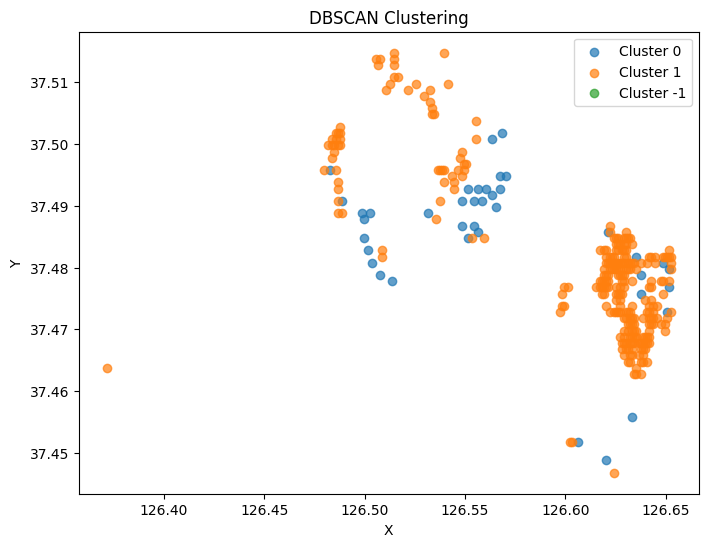

In [ ]:
import matplotlib.pyplot as plt

clustering = DBSCAN(eps= 0.6, min_samples=2).fit(scaled_data)
cluster_labels =clustering.labels_

plt.figure(figsize=(8, 6))
for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

### data_중구 -> dbscan clustering이 가장 유효

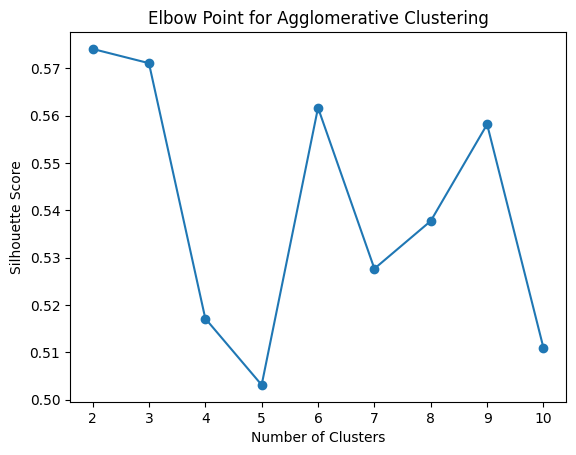

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FIELD_CAMP/data_중구.csv')
data.rename(columns={'수요지 id': 'id','초등학령인구':'population'}, inplace=True)
X = data[['X', 'Y']]

cluster_range = range(2, 11)
silhouette_scores = []

for num_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Point for Agglomerative Clustering')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


X = data[['X', 'Y']]

clustering = AgglomerativeClustering(linkage='ward', n_clusters=6)
cluster_labels = clustering.fit_predict(X)

data['cluster'] = cluster_labels

# cluster 별 초등학령인구 재계산
grouped_clusters = data.groupby('cluster').agg({'id': list, 'population': 'sum'})
print(grouped_clusters)

                                                        id  population
cluster                                                               
0        [C63, C64, C65, C66, C67, C68, C69, C70, C71, ...        3109
1        [C45, C46, C47, C48, C49, C50, C51, C52, C53, ...         183
2        [C25, C26, C27, C28, C29, C30, C33, C35, C36, ...        1833
3        [C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12...         781
4        [C31, C32, C34, C37, C38, C40, C41, C42, C43, ...          36
5                                                     [C1]           1


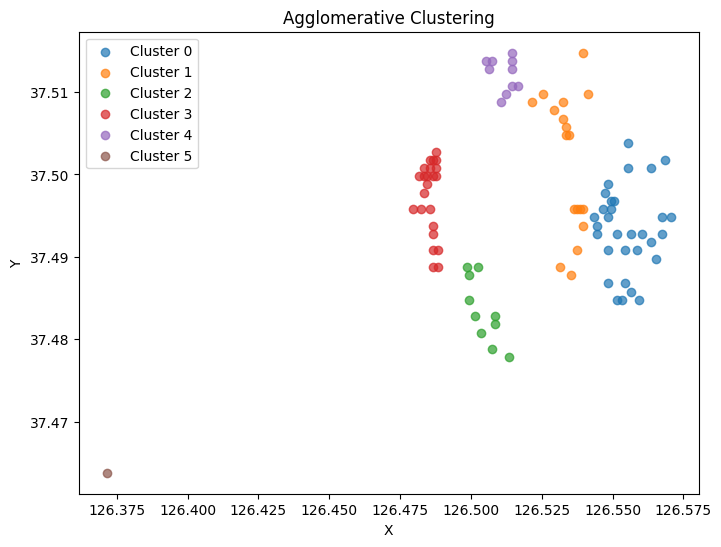

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()

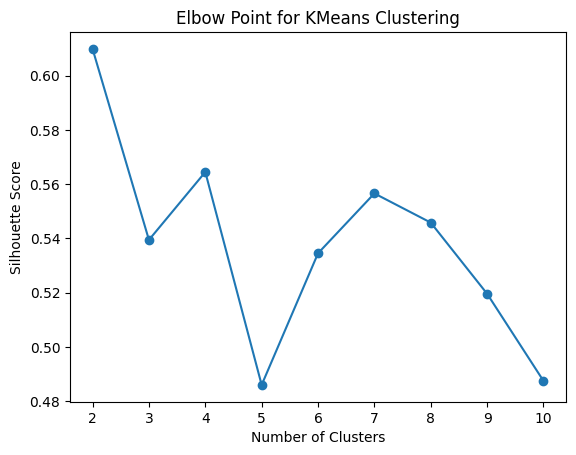

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#kmeans clustering
cluster_range = range(2, 11)
silhouette_scores = []
X = data[['X', 'Y']]

for num_clusters in cluster_range:
    clustering = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
    cluster_labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Point for KMeans Clustering')
plt.show()

In [ ]:
# Select only the 'x좌표' and 'y좌표' columns for clustering
X = data[['X', 'Y']]

clustering = KMeans(n_clusters=4, random_state=0, n_init="auto")
cluster_labels = clustering.fit_predict(X)

data['cluster'] = cluster_labels

# cluster 별 초등학령인구 재계산
grouped_clusters = data.groupby('cluster').agg({'id': list, 'population': 'sum'})
print(grouped_clusters)

                                                        id  population
cluster                                                               
0        [C31, C32, C34, C37, C38, C40, C41, C42, C43, ...          62
1        [C48, C54, C55, C56, C57, C58, C59, C60, C62, ...        3266
2        [C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12...        2614
3                                                     [C1]           1


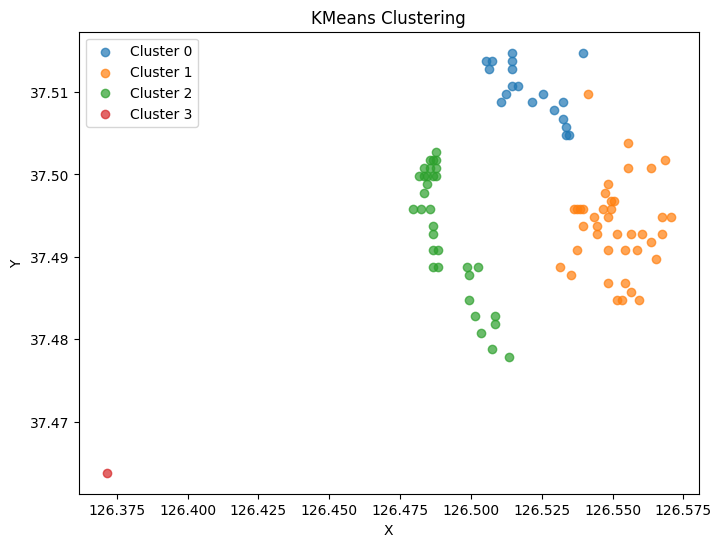

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

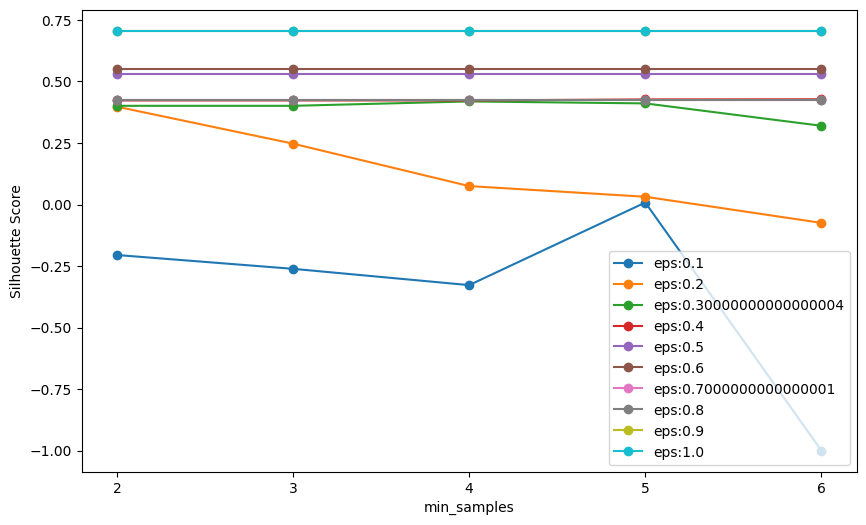

Best Silhouette Score: 0.706932292275274
Best Parameters: {'eps': 0.9, 'min_samples': 2}
sil scores: [[-0.2051601113761604, -0.2612810337541378, -0.32755588006446057, 0.008138000441872009, -1], [0.3976777476554925, 0.2474008769228818, 0.07499321460749978, 0.031619702280026925, -0.0746326377792393], [0.40116132409555666, 0.40116132409555666, 0.41899662350234557, 0.4109991026990459, 0.320036175211858], [0.42296967565299143, 0.42296967565299143, 0.42296967565299143, 0.427168076908681, 0.4278007597402653], [0.5297549974652846, 0.5297549974652846, 0.5297549974652846, 0.5297549974652846, 0.5297549974652846], [0.5507515151774092, 0.5507515151774092, 0.5507515151774092, 0.5507515151774092, 0.5507515151774092], [0.4254283324166374, 0.4254283324166374, 0.4254283324166374, 0.4254283324166374, 0.4254283324166374], [0.4254283324166374, 0.4254283324166374, 0.4254283324166374, 0.4254283324166374, 0.4254283324166374], [0.706932292275274, 0.706932292275274, 0.706932292275274, 0.706932292275274, 0.70693

In [ ]:
#진수님 코드
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['X', 'Y']])
dbscan = DBSCAN(min_samples=2)
dbscan.fit(scaled_data)

# eps_list1 = [0.05, 0.1, 0.5, 0.7, 1.0,1.25,1.5,2]
eps_list = np.arange(0.1, 1.1,0.1)
min_samples_list = [2,3,4,5,6]
# np.arange(0.1, 1,0.05)
# 계산한 silhouette score를 저장할 리스트
sil_scores = []
best_score=0
best_params={}
# eps와 min_samples를 바꿔가며 silhouette score 계산
for eps in eps_list:
    sil_scores_n=[]
    for min_samples in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(scaled_data)
        if len(set(cluster_labels)) > 1:
            cluster_labels[cluster_labels == -1] = len(set(cluster_labels))
            score = silhouette_score(scaled_data, cluster_labels)

            sil_scores_n.append(score)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples':min_samples}
        else:
            sil_scores_n.append(-1)  # 클러스터가 하나 이하인 경우는 silhouette score를 -1로 처리
    sil_scores.append(sil_scores_n)

# 계산한 silhouette score로 elbow point 그래프 그리기
scores_2d = np.array(sil_scores).reshape(len(eps_list), len(min_samples_list))
plt.figure(figsize=(10, 6))
for i, eps in enumerate(eps_list):
    plt.plot(min_samples_list, scores_2d[i], 'o-', label='eps: {}'.format(eps))
plt.xticks(min_samples_list)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend(['eps:{}'.format(eps) for eps in eps_list])
plt.show()

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)
print("sil scores:", sil_scores)

In [ ]:
import matplotlib.pyplot as plt

clustering = DBSCAN(eps= 0.6, min_samples=2).fit(scaled_data)
cluster_labels =clustering.labels_


data['cluster'] = cluster_labels

# cluster 별 초등학령인구 재계산
grouped_clusters = data.groupby('cluster').agg({'id': list, 'population': 'sum'})
print(grouped_clusters)

                                                        id  population
cluster                                                               
-1                                                    [C1]           1
 0       [C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12...        2614
 1       [C31, C32, C34, C37, C38, C40, C41, C42, C43, ...          64
 2       [C48, C54, C55, C56, C57, C58, C59, C60, C63, ...        3264


In [ ]:
data.to_csv('data_중구_clusters.csv', index=False)

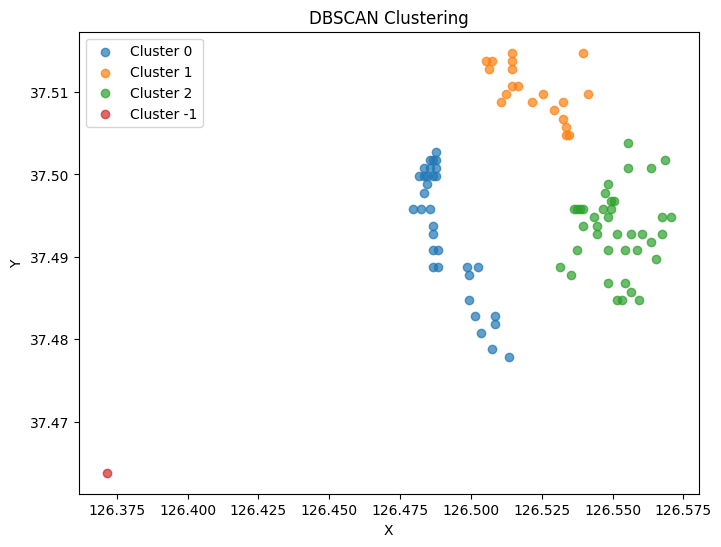

In [ ]:
plt.figure(figsize=(8, 6))
for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [ ]:
target_data =pd.read_csv("/content/drive/MyDrive/FIELD_CAMP/target_바다제외_중구.csv")

target_data.rename(columns={'학교 id': 'id'}, inplace=True)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# 각 학교 후보지의 위치와 각 클러스터 내에서의 거리 계산
cluster_distances = []
for target_point in target_data[['X', 'Y']].values:
    distances = []
    for cluster_center in data.groupby('cluster').mean()[['X', 'Y']].values:
        distance = np.linalg.norm(target_point - cluster_center)
        distances.append(distance)
    cluster_distances.append(distances)

# 가장 가까운 거리를 가진 클러스터 선택
target_cluster_labels = np.argmin(cluster_distances, axis=1) -1
target_data['cluster'] = target_cluster_labels

# 결과 출력
target_data

,id,X,Y,cluster
0,F2,126.568726,37.496302,2
1,F3,126.492770,37.484428,0
2,F29,126.517925,37.514117,1
3,F33,126.557041,37.502666,2
4,F34,126.561206,37.505494,2
5,F35,126.556550,37.489165,2
6,F36,126.524555,37.477604,2
7,F37,126.540118,37.498121,2
8,F38,126.522964,37.508854,1
9,F40,126.512497,37.475108,0


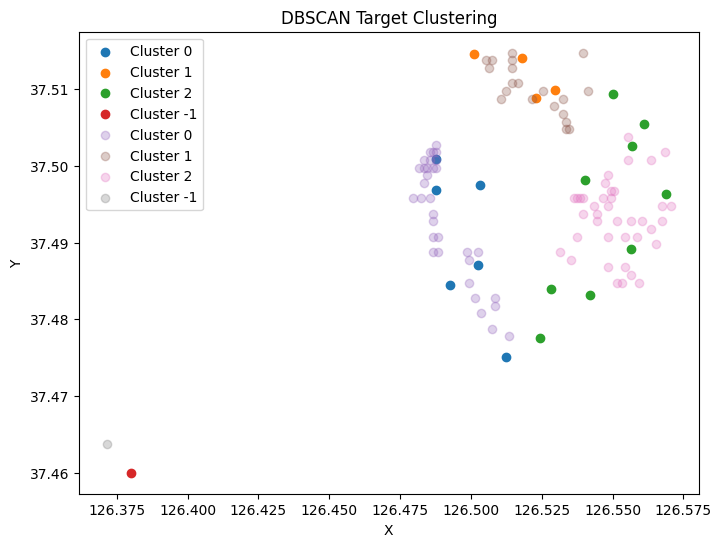

In [ ]:
plt.figure(figsize=(8, 6))
for target_cluster_label in set(target_cluster_labels):
    cluster_data = target_data[target_data['cluster'] == target_cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {target_cluster_label}', alpha=1)

for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.3)



plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Target Clustering')
plt.legend()
plt.show()

In [ ]:
target_data.to_csv('target_중구_clusters.csv', index=False)

# data_동구 -> Agglomerative clustreing 가장 유효



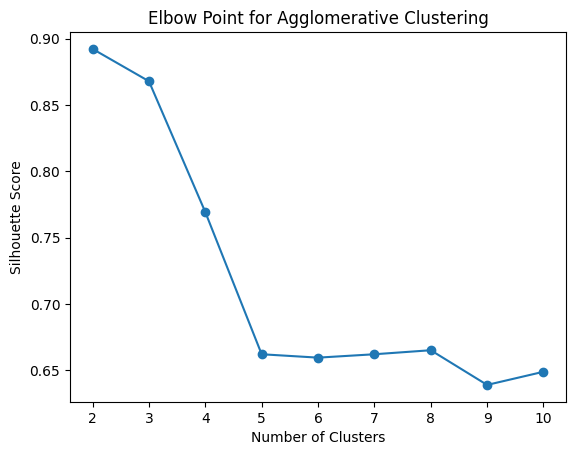

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FIELD_CAMP/data_동구.csv')
data.rename(columns={'수요지 id': 'id','초등학령인구':'population'}, inplace=True)
X = data[['X', 'Y', 'population']]

cluster_range = range(2, 11)
silhouette_scores = []

for num_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Point for Agglomerative Clustering')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


X = data[['X', 'Y']]

clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
cluster_labels = clustering.fit_predict(X)

data['cluster'] = cluster_labels

# cluster 별 초등학령인구 재계산
grouped_clusters = data.groupby('cluster').agg({'id': list, 'population': 'sum'})
print(grouped_clusters)

                                                        id  population
cluster                                                               
0        [C161, C171, C172, C178, C179, C180, C181, C18...        2251
1        [C94, C95, C96, C97, C98, C99, C100, C101, C10...         424
2        [C103, C104, C105, C106, C107, C108, C109, C11...        1593


In [ ]:
data.to_csv('data_동구_clusters.csv', index=False)

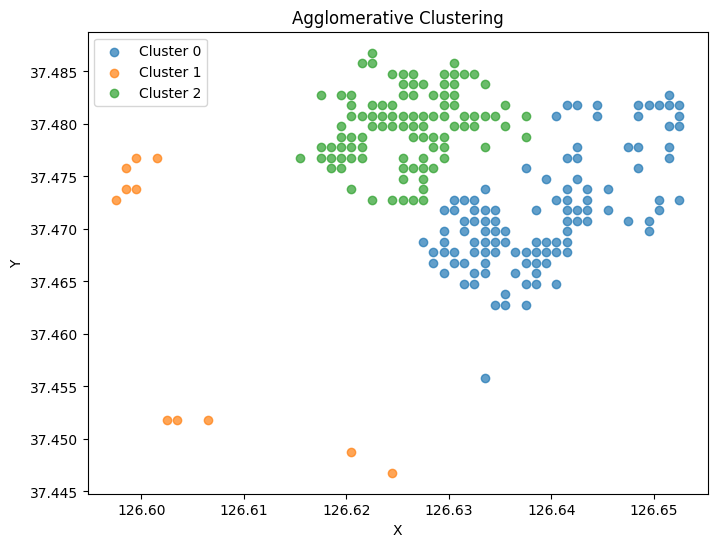

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

target_data =pd.read_csv("/content/drive/MyDrive/FIELD_CAMP/target_바다제외_동구.csv")

target_data.rename(columns={'학교 id': 'id'}, inplace=True)

# 각 학교 후보지의 위치와 각 클러스터 내에서의 거리 계산
cluster_distances = []
for target_point in target_data[['X', 'Y']].values:
    distances = []
    for cluster_center in data.groupby('cluster').mean()[['X', 'Y']].values:
        distance = np.linalg.norm(target_point - cluster_center)
        distances.append(distance)
    cluster_distances.append(distances)

# 가장 가까운 거리를 가진 클러스터 선택
target_cluster_labels = np.argmin(cluster_distances, axis=1)
target_data['cluster'] = target_cluster_labels

# 결과 출력
target_data

,id,X,Y,cluster
0,F6,126.633745,37.457406,0
1,F8,126.641720,37.476152,0
2,F9,126.621955,37.474686,2
3,F10,126.651355,37.482392,0
4,F12,126.623247,37.477803,2
5,F13,126.644058,37.449742,0
6,F14,126.629719,37.459998,0
7,F15,126.597600,37.457761,1
8,F16,126.629014,37.470546,2
9,F17,126.640453,37.448631,0


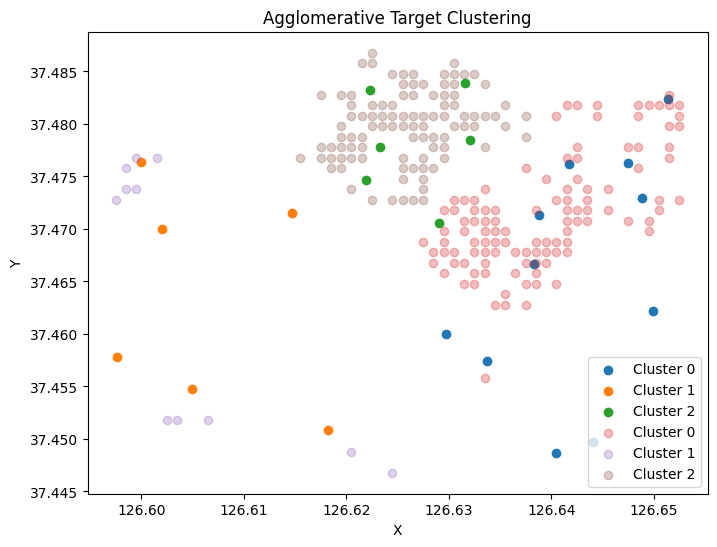

In [ ]:
plt.figure(figsize=(8, 6))
for target_cluster_label in set(target_cluster_labels):
    cluster_data = target_data[target_data['cluster'] == target_cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {target_cluster_label}', alpha=1)

for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.3)



plt.xlabel('X')
plt.ylabel('Y')
plt.title('Agglomerative Target Clustering')
plt.legend()
plt.show()

In [ ]:
target_data.to_csv('target_동구_clusters.csv', index=False)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# 각 학교 후보지의 위치와 각 클러스터 내에서의 거리 계산
cluster_distances = []
for target_point in target_data[['X', 'Y']].values:
    distances = []
    for cluster_center in data.groupby('cluster').mean()[['X', 'Y']].values:
        distance = np.linalg.norm(target_point - cluster_center)
        distances.append(distance)
    cluster_distances.append(distances)

# 가장 가까운 거리를 가진 클러스터 선택
target_cluster_labels = np.argmin(cluster_distances, axis=1) -1
target_data['cluster'] = target_cluster_labels

# 결과 출력
target_data

,id,X,Y,cluster
0,F6,126.633745,37.457406,-1
1,F8,126.641720,37.476152,-1
2,F9,126.621955,37.474686,1
3,F10,126.651355,37.482392,-1
4,F12,126.623247,37.477803,1
5,F13,126.644058,37.449742,-1
6,F14,126.629719,37.459998,-1
7,F15,126.597600,37.457761,0
8,F16,126.629014,37.470546,1
9,F17,126.640453,37.448631,-1


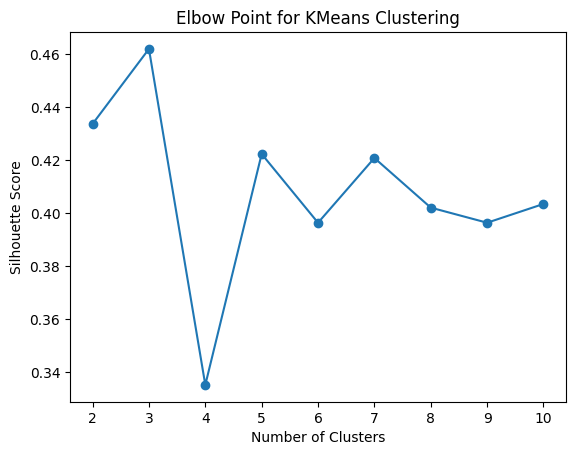

In [ ]:
#kmeans clustering
cluster_range = range(2, 11)
silhouette_scores = []
X = data[['X', 'Y']]

for num_clusters in cluster_range:
    clustering = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
    cluster_labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Point for KMeans Clustering')
plt.show()

In [ ]:
# Select only the 'x좌표' and 'y좌표' columns for clustering
X = data[['X', 'Y']]

clustering = KMeans(n_clusters=3, random_state=0, n_init="auto")
cluster_labels = clustering.fit_predict(X)

data['cluster'] = cluster_labels

# cluster 별 초등학령인구 재계산
grouped_clusters = data.groupby('cluster').agg({'id': list, 'population': 'sum'})
print(grouped_clusters)

                                                        id  population
cluster                                                               
0        [C171, C172, C178, C179, C180, C181, C191, C19...        2672
1        [C103, C104, C105, C106, C107, C108, C109, C11...        1172
2        [C94, C95, C96, C97, C98, C99, C100, C101, C10...         424


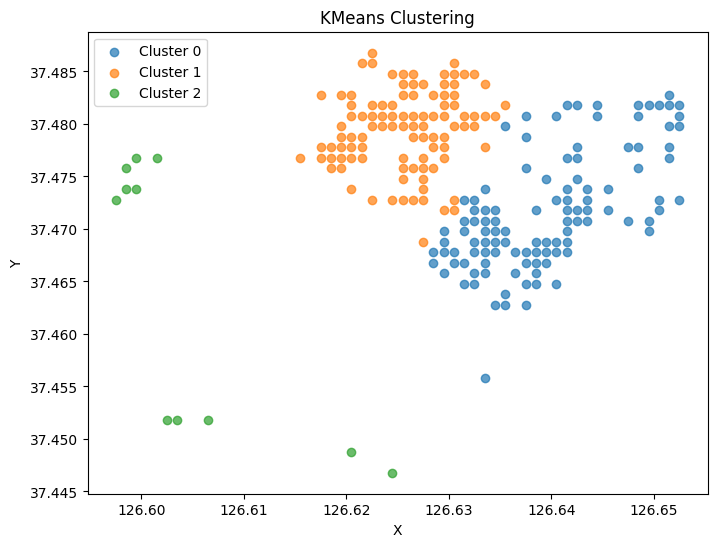

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [ ]:
target_data =pd.read_csv("/content/drive/MyDrive/FIELD_CAMP/target_바다제외_동구.csv")

target_data.rename(columns={'학교 id': 'id'}, inplace=True)
X = target_data[['X', 'Y']]

cluster_labels = clustering.predict(X)

target_data['cluster'] = cluster_labels

grouped_clusters = target_data.groupby('cluster').agg({'id': list})
print(grouped_clusters)

                                                        id
cluster                                                   
0        [F6, F8, F10, F13, F14, F17, F20, F21, F26, F3...
1                            [F9, F12, F16, F18, F22, F24]
2                           [F15, F19, F23, F25, F28, F32]


In [ ]:
target_data

,id,X,Y,cluster
0,F6,126.633745,37.457406,0
1,F8,126.641720,37.476152,0
2,F9,126.621955,37.474686,1
3,F10,126.651355,37.482392,0
4,F12,126.623247,37.477803,1
5,F13,126.644058,37.449742,0
6,F14,126.629719,37.459998,0
7,F15,126.597600,37.457761,2
8,F16,126.629014,37.470546,1
9,F17,126.640453,37.448631,0


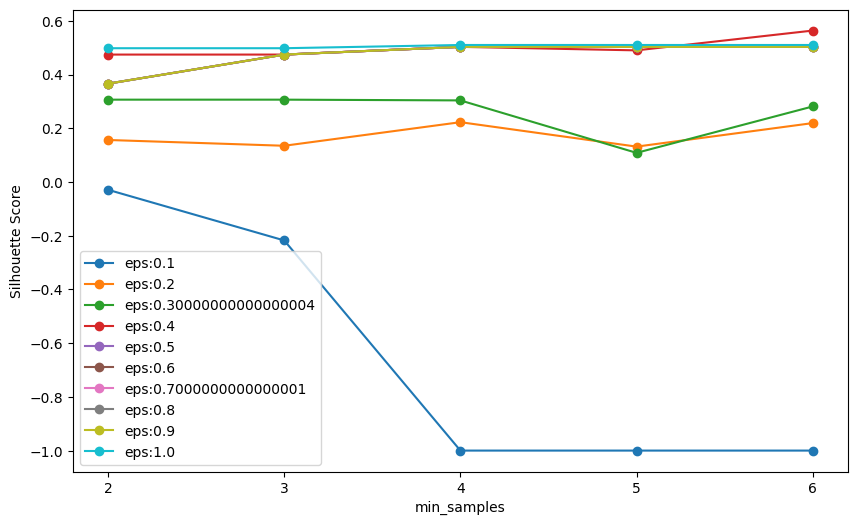

Best Silhouette Score: 0.5638149122193666
Best Parameters: {'eps': 0.4, 'min_samples': 6}
sil scores: [[-0.029063027407564734, -0.21762624864958294, -1, -1, -1], [0.1564723535786414, 0.13495505992552576, 0.22272583980325847, 0.13175312732725977, 0.21934830831388452], [0.3066214962363133, 0.3066214962363133, 0.3038422566575539, 0.10853396826161268, 0.2812677783883857], [0.4744867276233565, 0.4744867276233565, 0.5031905476860364, 0.4901424977366642, 0.5638149122193666], [0.36615425910516153, 0.4744867276233565, 0.5031905476860364, 0.5031905476860364, 0.5031905476860364], [0.36615425910516153, 0.4744867276233565, 0.5031905476860364, 0.5031905476860364, 0.5031905476860364], [0.36615425910516153, 0.4744867276233565, 0.5031905476860364, 0.5031905476860364, 0.5031905476860364], [0.36615425910516153, 0.4744867276233565, 0.5031905476860364, 0.5031905476860364, 0.5031905476860364], [0.36615425910516153, 0.4744867276233565, 0.5031905476860364, 0.5031905476860364, 0.5031905476860364], [0.498146356

In [ ]:
#진수님 코드
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['X', 'Y']])
dbscan = DBSCAN(min_samples=2)
dbscan.fit(scaled_data)

# eps_list1 = [0.05, 0.1, 0.5, 0.7, 1.0,1.25,1.5,2]
eps_list = np.arange(0.1, 1.1,0.1)
min_samples_list = [2,3,4,5,6]
# np.arange(0.1, 1,0.05)
# 계산한 silhouette score를 저장할 리스트
sil_scores = []
best_score=0
best_params={}
# eps와 min_samples를 바꿔가며 silhouette score 계산
for eps in eps_list:
    sil_scores_n=[]
    for min_samples in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(scaled_data)
        if len(set(cluster_labels)) > 1:
            cluster_labels[cluster_labels == -1] = len(set(cluster_labels))
            score = silhouette_score(scaled_data, cluster_labels)

            sil_scores_n.append(score)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples':min_samples}
        else:
            sil_scores_n.append(-1)  # 클러스터가 하나 이하인 경우는 silhouette score를 -1로 처리
    sil_scores.append(sil_scores_n)

# 계산한 silhouette score로 elbow point 그래프 그리기
scores_2d = np.array(sil_scores).reshape(len(eps_list), len(min_samples_list))
plt.figure(figsize=(10, 6))
for i, eps in enumerate(eps_list):
    plt.plot(min_samples_list, scores_2d[i], 'o-', label='eps: {}'.format(eps))
plt.xticks(min_samples_list)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend(['eps:{}'.format(eps) for eps in eps_list])
plt.show()

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)
print("sil scores:", sil_scores)

In [ ]:
import matplotlib.pyplot as plt

clustering = DBSCAN(eps= 0.4, min_samples=6).fit(scaled_data)
cluster_labels =clustering.labels_


data['cluster'] = cluster_labels

# cluster 별 초등학령인구 재계산
grouped_clusters = data.groupby('cluster').agg({'id': list, 'population': 'sum'})
print(grouped_clusters)

                                                        id  population
cluster                                                               
-1       [C94, C95, C96, C97, C98, C99, C100, C101, C10...         590
 0       [C103, C104, C105, C106, C107, C108, C109, C11...        3678


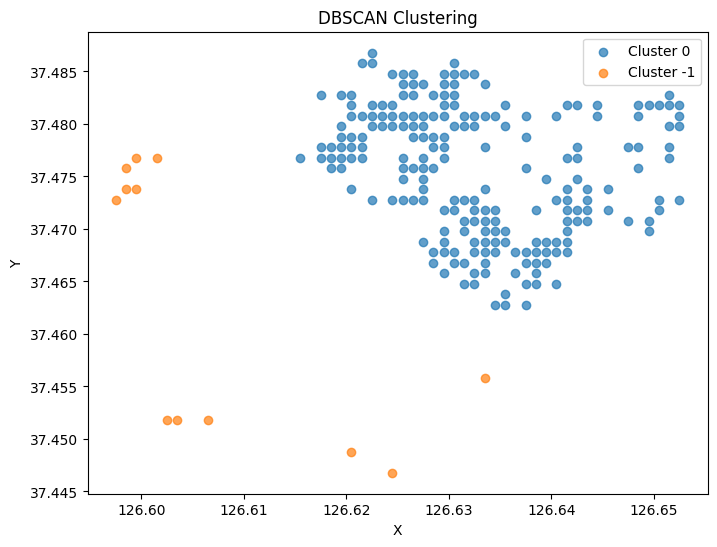

In [ ]:
plt.figure(figsize=(8, 6))
for cluster_label in set(cluster_labels):
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv("/content/data_동구_clusters.csv")
data

,id,X,Y,population,cluster
0,C94,126.597505,37.472782,1,1
1,C95,126.598505,37.473782,1,1
2,C96,126.598505,37.475782,2,1
3,C97,126.599505,37.473782,3,1
4,C98,126.599505,37.476782,1,1
...,...,...,...,...,...
213,C307,126.651505,37.482782,2,0
214,C308,126.652505,37.472782,12,0
215,C309,126.652505,37.479782,1,0
216,C310,126.652505,37.480782,1,0


In [ ]:
target_value = 'cluster'  # 추출하려는 특정 값으로 대체

filtered_data = data[data[target_value] == 0]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '수요지 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('data_동구_cluster_0.csv', index=False)


filtered_data = data[data[target_value] == 1]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '수요지 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('data_동구_cluster_1.csv', index=False)

filtered_data = data[data[target_value] == 2]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '수요지 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('data_동구_cluster_2.csv', index=False)

In [ ]:
data = pd.read_csv("/content/data_중구_clusters.csv")
data

,id,X,Y,population,cluster
0,C1,126.371505,37.463782,1,-1
1,C2,126.479505,37.495782,46,0
2,C3,126.481505,37.499782,36,0
3,C4,126.482505,37.495782,81,0
4,C5,126.483505,37.497782,25,0
...,...,...,...,...,...
88,C89,126.565505,37.489782,204,2
89,C90,126.567505,37.492782,190,2
90,C91,126.567505,37.494782,134,2
91,C92,126.568505,37.501782,114,2


In [ ]:
target_value = 'cluster'  # 추출하려는 특정 값으로 대체

filtered_data = data[data[target_value] == 0]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '수요지 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('data_중구_cluster_0.csv', index=False)

filtered_data = data[data[target_value] == 1]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '수요지 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('data_중구_cluster_1.csv', index=False)

filtered_data = data[data[target_value] == 2]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '수요지 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('data_중구_cluster_2.csv', index=False)

filtered_data = data[data[target_value] == -1]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '수요지 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('data_중구_cluster_-1.csv', index=False)

In [ ]:
data = pd.read_csv("/content/target_동구_clusters.csv")
data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)

In [ ]:
data

,학교 id,X,Y,cluster
0,F6,126.633745,37.457406,0
1,F8,126.641720,37.476152,0
2,F9,126.621955,37.474686,2
3,F10,126.651355,37.482392,0
4,F12,126.623247,37.477803,2
5,F13,126.644058,37.449742,0
6,F14,126.629719,37.459998,0
7,F15,126.597600,37.457761,1
8,F16,126.629014,37.470546,2
9,F17,126.640453,37.448631,0


In [ ]:
target_value = 'cluster'  # 추출하려는 특정 값으로 대체


filtered_data = data[data[target_value] == 0]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('target_동구_cluster_0.csv', index=False)


filtered_data = data[data[target_value] == 1]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('target_동구_cluster_1.csv', index=False)

filtered_data = data[data[target_value] == 2]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('target_동구_cluster_2.csv', index=False)

In [ ]:
data = pd.read_csv("/content/target_중구_clusters.csv")
data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)
data

,학교 id,X,Y,cluster
0,F2,126.568726,37.496302,2
1,F3,126.492770,37.484428,0
2,F29,126.517925,37.514117,1
3,F33,126.557041,37.502666,2
4,F34,126.561206,37.505494,2
5,F35,126.556550,37.489165,2
6,F36,126.524555,37.477604,2
7,F37,126.540118,37.498121,2
8,F38,126.522964,37.508854,1
9,F40,126.512497,37.475108,0


In [ ]:
target_value = 'cluster'  # 추출하려는 특정 값으로 대체

filtered_data = data[data[target_value] == 0]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('target_중구_cluster_0.csv', index=False)

filtered_data = data[data[target_value] == 1]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('target_중구_cluster_1.csv', index=False)

filtered_data = data[data[target_value] == 2]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('target_중구_cluster_2.csv', index=False)

filtered_data = data[data[target_value] == -1]
columns_to_drop = ['cluster']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.rename(columns={'id' : '학교 id' ,'population':'초등학령인구'}, inplace=True)
filtered_data.to_csv('target_중구_cluster_-1.csv', index=False)

In [ ]:
data

,학교 id,X,Y,cluster
0,F2,126.568726,37.496302,2
1,F3,126.492770,37.484428,0
2,F29,126.517925,37.514117,1
3,F33,126.557041,37.502666,2
4,F34,126.561206,37.505494,2
5,F35,126.556550,37.489165,2
6,F36,126.524555,37.477604,2
7,F37,126.540118,37.498121,2
8,F38,126.522964,37.508854,1
9,F40,126.512497,37.475108,0


# 최적화

In [ ]:
school = []
cost = []

동구 cluster 0

In [ ]:
import pandas as pd

demand_data = pd.read_csv('data_동구_cluster_0.csv')
target_data = pd.read_csv('target_동구_cluster_0.csv')


### 수요지 위치 딕셔너리 생성
demand_points_location = {}
for index, row in demand_data.iterrows():
    demand_points_location[row['수요지 id']] = (row['X'], row['Y'])

### 수요지 수요량 딕셔너리 생성
demand_points_demand = {}
for index, row in demand_data.iterrows():
    demand_points_demand[row['수요지 id']] = row['초등학령인구']

### 시설물 후보지 위치 딕셔너리 생성
facility_points_location = {}
for index, row in target_data.iterrows():
    facility_points_location[row['학교 id']] = (row['X'], row['Y'])

### distance_dictionary 생성 (유클리디안 거리)
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

distance_dictionary= {}
for demand_point, demand_location in demand_points_location.items():
    for facility_point, facility_location in facility_points_location.items():
        distance_dictionary[(demand_point, facility_point)] = euclidean_distance(demand_location, facility_location)


### real_distance_dictionary 생성 (실제 거리) (단위: km)
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리 계산 함수
def calculate_actual_distance(demand_id, facility_id):
    demand_location = demand_points_location.get(demand_id)
    facility_location = facility_points_location.get(facility_id)

    if demand_location is None or facility_location is None:
        return None

    lon1, lat1 = demand_location
    lon2, lat2 = facility_location

    ##### Haversine 공식 사용하여 실제 거리 계산
    distance_km = haversine_distance(lon1, lat1, lon2, lat2)

    return distance_km

#### 실제 거리를 저장할 딕셔너리 생성
real_distance_dictionary = {}

##### 모든 수요지와 시설물 사이의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id, demand_location in demand_points_location.items():
    for facility_id, facility_location in facility_points_location.items():
        distance_km = calculate_actual_distance(demand_id, facility_id)
        real_distance_dictionary[(demand_id, facility_id)] = distance_km

### real_distance_dictionary를 행렬로 변환


demand_ids = [demand_id for demand_id in demand_points_location]
facility_ids = [facility_id for facility_id in facility_points_location]

real_distance_matrix = pd.DataFrame(index = demand_ids, columns = facility_ids)


for demand_id, facility_id in real_distance_dictionary:
    real_distance_matrix.loc[demand_id, facility_id] = real_distance_dictionary[(demand_id, facility_id)]

real_distance_matrix = real_distance_matrix.astype(float)

print(real_distance_matrix)

            F6        F8       F10       F13       F14       F17       F20  \
C161  1.379666  1.498416  2.592268  2.572338  0.996178  2.515372  0.978866   
C171  1.140561  1.563833  2.660609  2.339796  0.762006  2.277276  0.862818   
C172  1.243020  1.492056  2.589430  2.430711  0.872236  2.376383  0.871158   
C178  1.003760  1.578474  2.670047  2.197977  0.643518  2.138017  0.781166   
C179  1.212950  1.424139  2.521318  2.381976  0.865836  2.338549  0.783848   
...        ...       ...       ...       ...       ...       ...       ...   
C307  3.227780  1.135372  0.045372  3.732206  3.180471  3.920740  2.135639   
C308  2.380047  1.022781  1.073348  2.668211  2.462750  2.888522  1.426080   
C309  2.988618  1.033748  0.307401  3.422481  2.980548  3.623525  1.921655   
C310  3.081800  1.082022  0.205734  3.531087  3.063531  3.729962  2.007157   
C311  3.176142  1.139138  0.122011  3.639850  3.148256  3.836669  2.095073   

           F21       F26       F30       F31  
C161  1.037010  

In [ ]:
### demand_distance_dictionary 생성 (실제 거리) (단위: km)
import pandas as pd
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리를 저장할 딕셔너리 생성
demand_distance_dictionary = {}

##### 모든 수요지 쌍의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id1, demand_location1 in demand_points_location.items():
    for demand_id2, demand_location2 in demand_points_location.items():
        if demand_id1 == demand_id2:
            distance_km = 0
        distance_km = haversine_distance(demand_location1[0], demand_location1[1], demand_location2[0], demand_location2[1])
        demand_distance_dictionary[(demand_id1, demand_id2)] = distance_km

### demand_distance_dictionary의 요소 확인
print(demand_distance_dictionary.keys())
print(len(demand_distance_dictionary.keys()))

dict_keys([('C161', 'C161'), ('C161', 'C171'), ('C161', 'C172'), ('C161', 'C178'), ('C161', 'C179'), ('C161', 'C180'), ('C161', 'C181'), ('C161', 'C182'), ('C161', 'C191'), ('C161', 'C192'), ('C161', 'C193'), ('C161', 'C194'), ('C161', 'C201'), ('C161', 'C202'), ('C161', 'C203'), ('C161', 'C204'), ('C161', 'C205'), ('C161', 'C209'), ('C161', 'C210'), ('C161', 'C211'), ('C161', 'C212'), ('C161', 'C213'), ('C161', 'C214'), ('C161', 'C215'), ('C161', 'C219'), ('C161', 'C220'), ('C161', 'C221'), ('C161', 'C222'), ('C161', 'C223'), ('C161', 'C224'), ('C161', 'C225'), ('C161', 'C226'), ('C161', 'C227'), ('C161', 'C231'), ('C161', 'C232'), ('C161', 'C233'), ('C161', 'C234'), ('C161', 'C235'), ('C161', 'C236'), ('C161', 'C238'), ('C161', 'C239'), ('C161', 'C240'), ('C161', 'C241'), ('C161', 'C244'), ('C161', 'C245'), ('C161', 'C246'), ('C161', 'C247'), ('C161', 'C248'), ('C161', 'C249'), ('C161', 'C250'), ('C161', 'C253'), ('C161', 'C254'), ('C161', 'C255'), ('C161', 'C256'), ('C161', 'C257'),

In [ ]:
### demand_distance_dictionary를 행렬로 변환
import pandas as pd

demand_id1s = [demand_id1 for demand_id1 in demand_points_location]
demand_id2s = [demand_id2 for demand_id2 in demand_points_location]

demand_distance_matrix = pd.DataFrame(index = demand_id1s, columns = demand_id1s)

for id1, id2 in demand_distance_dictionary:
    demand_distance_matrix.loc[id1, id2] = demand_distance_dictionary[(id1, id2)]

demand_distance_matrix = demand_distance_matrix.astype(float)

print(demand_distance_matrix)

          C161      C171      C172      C178      C179      C180      C181  \
C161  0.000000  0.239262  0.141962  0.377406  0.208614  0.176507  0.208612   
C171  0.239262  0.000000  0.111195  0.141963  0.141962  0.239262  0.345062   
C172  0.141962  0.111195  0.000000  0.239262  0.088255  0.141962  0.239261   
C178  0.377406  0.141963  0.239262  0.000000  0.222390  0.333585  0.444780   
C179  0.208614  0.141962  0.088255  0.222390  0.000000  0.111195  0.222390   
...        ...       ...       ...       ...       ...       ...       ...   
C307  2.628473  2.699044  2.627068  2.709700  2.559503  2.488461  2.420445   
C308  2.250671  2.220653  2.189802  2.173943  2.104561  2.077942  2.056997   
C309  2.522561  2.564241  2.503231  2.557968  2.429021  2.369749  2.314304   
C310  2.578300  2.628518  2.564218  2.627110  2.491826  2.428998  2.369725   
C311  2.637551  2.695851  2.628495  2.699064  2.557924  2.491804  2.428976   

          C182      C191      C192  ...      C302      C303    

In [ ]:
### Without Clustering
#### 최대 실행 시간: 10분
import pulp
import pandas as pd

submission_1 = pd.read_csv('/content/submission.csv')

demand_sites = list(demand_points_location.keys())
facility_sites = list(facility_points_location.keys())
demand_amounts = demand_points_demand
distance = real_distance_dictionary

model = pulp.LpProblem(name="Facility_Location", sense = pulp.LpMinimize)
facilities = pulp.LpVariable.dicts("Facility", facility_sites, cat = pulp.LpBinary)
supply_amount = pulp.LpVariable.dicts("Supply", ((demand, facility) for demand in demand_sites for facility in facility_sites), lowBound = 0, cat = pulp.LpContinuous)

#### 목적식: 최소화해야 하는 식
model += 200_0000_0000 * pulp.lpSum(facilities) \
+ 160_0000 * pulp.lpSum([supply_amount[(demand, facility)] * distance[(demand, facility)] for demand in demand_sites for facility in facility_sites])
+ 10000_0000_0000 * pulp.lpSum([supply_amount[(demand, facility)] * (distance[(demand, facility)] // 1.5) for demand in demand_sites for facility in facility_sites])

#### 모든 수요지의 수요량 = 공급 받은량 (제약식 1)
for demand in demand_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for facility in facility_sites]) == demand_amounts[demand]

#### 시설물 1개당 최대 공급량 (제약식 2)
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) <= 750 * facilities[facility]

#### 설치된 각 시설물은 최소한 126 이상을 공급 해야됨 (제약식 3)
min_supply_per_facility = 126
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) >= min_supply_per_facility * facilities[facility]

#### 코드 실행 시간 제한
solver = pulp.PULP_CBC_CMD(maxSeconds = 10)

model.solve(solver)

price = pulp.value(model.objective)
cost.append(price)

print("Optimal Objective Value: ", price)
print("Optimal Solution:")
for facility in facility_sites:
    if pulp.value(facilities[facility]):
        print(f"{facility} is installed.")
        for demand in demand_sites:
            if pulp.value(supply_amount[(demand, facility)]) > 0:
              mask = (submission_1['수요지 id'] == demand) & (submission_1['학교 id'] == facility)
              indices = submission_1.loc[mask].index
              submission_1.loc[indices,'할당 학령인구'] = pulp.value(supply_amount[(demand, facility)])
              print(f" - {demand} is supplied {pulp.value(supply_amount[(demand, facility)])}")
submission_1.to_csv('submission.csv',index=False)

/usr/local/lib/python3.10/dist-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


Optimal Objective Value:  81630608775.86807
Optimal Solution:
F6 is installed.
 - C219 is supplied 166.0
 - C231 is supplied 18.0
F8 is installed.
 - C194 is supplied 1.0
 - C205 is supplied 4.0
 - C215 is supplied 2.0
 - C227 is supplied 2.0
 - C250 is supplied 320.0
 - C258 is supplied 1.0
 - C262 is supplied 1.0
 - C266 is supplied 6.0
 - C267 is supplied 14.0
 - C271 is supplied 2.0
 - C272 is supplied 3.0
 - C273 is supplied 3.0
 - C274 is supplied 33.0
 - C275 is supplied 4.0
 - C276 is supplied 62.0
 - C277 is supplied 2.0
 - C278 is supplied 2.0
 - C279 is supplied 1.0
 - C280 is supplied 2.0
 - C281 is supplied 2.0
 - C282 is supplied 50.0
 - C283 is supplied 2.0
 - C284 is supplied 1.0
 - C285 is supplied 1.0
 - C286 is supplied 4.0
 - C287 is supplied 11.0
 - C288 is supplied 31.0
F20 is installed.
 - C161 is supplied 1.0
 - C171 is supplied 4.0
 - C172 is supplied 2.0
 - C178 is supplied 34.0
 - C179 is supplied 9.0
 - C180 is supplied 20.0
 - C181 is supplied 22.0
 - C182 

In [ ]:
cost

[81630608775.86807]

동구 cluster 1

In [ ]:
import pandas as pd

demand_data = pd.read_csv('data_동구_cluster_1.csv')
target_data = pd.read_csv('target_동구_cluster_1.csv')


### 수요지 위치 딕셔너리 생성
demand_points_location = {}
for index, row in demand_data.iterrows():
    demand_points_location[row['수요지 id']] = (row['X'], row['Y'])

### 수요지 수요량 딕셔너리 생성
demand_points_demand = {}
for index, row in demand_data.iterrows():
    demand_points_demand[row['수요지 id']] = row['초등학령인구']

### 시설물 후보지 위치 딕셔너리 생성
facility_points_location = {}
for index, row in target_data.iterrows():
    facility_points_location[row['학교 id']] = (row['X'], row['Y'])

### distance_dictionary 생성 (유클리디안 거리)
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

distance_dictionary= {}
for demand_point, demand_location in demand_points_location.items():
    for facility_point, facility_location in facility_points_location.items():
        distance_dictionary[(demand_point, facility_point)] = euclidean_distance(demand_location, facility_location)


### real_distance_dictionary 생성 (실제 거리) (단위: km)
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리 계산 함수
def calculate_actual_distance(demand_id, facility_id):
    demand_location = demand_points_location.get(demand_id)
    facility_location = facility_points_location.get(facility_id)

    if demand_location is None or facility_location is None:
        return None

    lon1, lat1 = demand_location
    lon2, lat2 = facility_location

    ##### Haversine 공식 사용하여 실제 거리 계산
    distance_km = haversine_distance(lon1, lat1, lon2, lat2)

    return distance_km

#### 실제 거리를 저장할 딕셔너리 생성
real_distance_dictionary = {}

##### 모든 수요지와 시설물 사이의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id, demand_location in demand_points_location.items():
    for facility_id, facility_location in facility_points_location.items():
        distance_km = calculate_actual_distance(demand_id, facility_id)
        real_distance_dictionary[(demand_id, facility_id)] = distance_km

### real_distance_dictionary를 행렬로 변환


demand_ids = [demand_id for demand_id in demand_points_location]
facility_ids = [facility_id for facility_id in facility_points_location]

real_distance_matrix = pd.DataFrame(index = demand_ids, columns = facility_ids)


for demand_id, facility_id in real_distance_dictionary:
    real_distance_matrix.loc[demand_id, facility_id] = real_distance_dictionary[(demand_id, facility_id)]

real_distance_matrix = real_distance_matrix.astype(float)

print(real_distance_matrix)

           F15       F19       F23       F25       F28       F32
C94   1.670370  1.525021  2.108360  0.460040  3.049602  0.505032
C95   1.783334  1.452347  2.189588  0.321020  3.088502  0.524564
C96   2.005526  1.507039  2.404977  0.150025  3.274434  0.716708
C97   1.789461  1.365531  2.168242  0.295655  3.039532  0.478221
C98   2.121801  1.464432  2.494554  0.060712  3.324225  0.789649
C99   2.143024  1.304621  2.466475  0.138297  3.239917  0.759824
C100  0.793318  2.443751  0.397650  2.747419  1.395058  2.021763
C101  0.844738  2.406145  0.356947  2.755900  1.307039  2.025676
C102  1.029452  2.309948  0.358848  2.797941  1.043241  2.060184
C116  2.254920  2.578272  1.524070  3.565185  0.304006  2.866418
C138  2.670353  2.882134  1.939411  3.940621  0.713366  3.254534


In [ ]:
### demand_distance_dictionary 생성 (실제 거리) (단위: km)
import pandas as pd
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리를 저장할 딕셔너리 생성
demand_distance_dictionary = {}

##### 모든 수요지 쌍의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id1, demand_location1 in demand_points_location.items():
    for demand_id2, demand_location2 in demand_points_location.items():
        if demand_id1 == demand_id2:
            distance_km = 0
        distance_km = haversine_distance(demand_location1[0], demand_location1[1], demand_location2[0], demand_location2[1])
        demand_distance_dictionary[(demand_id1, demand_id2)] = distance_km

### demand_distance_dictionary의 요소 확인
print(demand_distance_dictionary.keys())
print(len(demand_distance_dictionary.keys()))

dict_keys([('C94', 'C94'), ('C94', 'C95'), ('C94', 'C96'), ('C94', 'C97'), ('C94', 'C98'), ('C94', 'C99'), ('C94', 'C100'), ('C94', 'C101'), ('C94', 'C102'), ('C94', 'C116'), ('C94', 'C138'), ('C95', 'C94'), ('C95', 'C95'), ('C95', 'C96'), ('C95', 'C97'), ('C95', 'C98'), ('C95', 'C99'), ('C95', 'C100'), ('C95', 'C101'), ('C95', 'C102'), ('C95', 'C116'), ('C95', 'C138'), ('C96', 'C94'), ('C96', 'C95'), ('C96', 'C96'), ('C96', 'C97'), ('C96', 'C98'), ('C96', 'C99'), ('C96', 'C100'), ('C96', 'C101'), ('C96', 'C102'), ('C96', 'C116'), ('C96', 'C138'), ('C97', 'C94'), ('C97', 'C95'), ('C97', 'C96'), ('C97', 'C97'), ('C97', 'C98'), ('C97', 'C99'), ('C97', 'C100'), ('C97', 'C101'), ('C97', 'C102'), ('C97', 'C116'), ('C97', 'C138'), ('C98', 'C94'), ('C98', 'C95'), ('C98', 'C96'), ('C98', 'C97'), ('C98', 'C98'), ('C98', 'C99'), ('C98', 'C100'), ('C98', 'C101'), ('C98', 'C102'), ('C98', 'C116'), ('C98', 'C138'), ('C99', 'C94'), ('C99', 'C95'), ('C99', 'C96'), ('C99', 'C97'), ('C99', 'C98'), ('C9

In [ ]:
### demand_distance_dictionary를 행렬로 변환
import pandas as pd

demand_id1s = [demand_id1 for demand_id1 in demand_points_location]
demand_id2s = [demand_id2 for demand_id2 in demand_points_location]

demand_distance_matrix = pd.DataFrame(index = demand_id1s, columns = demand_id1s)

for id1, id2 in demand_distance_dictionary:
    demand_distance_matrix.loc[id1, id2] = demand_distance_dictionary[(id1, id2)]

demand_distance_matrix = demand_distance_matrix.astype(float)

print(demand_distance_matrix)

           C94       C95       C96       C97       C98       C99      C100  \
C94   0.000000  0.141958  0.345060  0.208604  0.478517  0.567828  2.376429   
C95   0.141958  0.000000  0.222390  0.088248  0.345060  0.425870  2.471632   
C96   0.345060  0.222390  0.000000  0.239259  0.141956  0.287139  2.691929   
C97   0.208604  0.088248  0.239259  0.000000  0.333585  0.377397  2.460576   
C98   0.478517  0.345060  0.141956  0.333585  0.000000  0.176489  2.792454   
C99   0.567828  0.425870  0.287139  0.377397  0.176489  0.000000  2.781274   
C100  2.376429  2.471632  2.691929  2.460576  2.792454  2.781274  0.000000   
C101  2.394390  2.485775  2.704919  2.471632  2.802201  2.785472  0.088274   
C102  2.466507  2.546151  2.760505  2.523100  2.847699  2.814682  0.353095   
C116  3.353052  3.390898  3.575469  3.341139  3.623396  3.536354  1.623599   
C138  3.746681  3.778883  3.957855  3.725942  3.999593  3.904982  2.020103   

          C101      C102      C116      C138  
C94   2.394390  

In [ ]:
### Without Clustering
#### 최대 실행 시간: 10분
import pulp
submission = pd.read_csv('/content/submission.csv')

demand_sites = list(demand_points_location.keys())
facility_sites = list(facility_points_location.keys())
demand_amounts = demand_points_demand
distance = real_distance_dictionary

model = pulp.LpProblem(name="Facility_Location", sense = pulp.LpMinimize)
facilities = pulp.LpVariable.dicts("Facility", facility_sites, cat = pulp.LpBinary)
supply_amount = pulp.LpVariable.dicts("Supply", ((demand, facility) for demand in demand_sites for facility in facility_sites), lowBound = 0, cat = pulp.LpContinuous)

#### 목적식: 최소화해야 하는 식
model += 200_0000_0000 * pulp.lpSum(facilities) \
+ 160_0000 * pulp.lpSum([supply_amount[(demand, facility)] * distance[(demand, facility)] for demand in demand_sites for facility in facility_sites])
+ 10000_0000_0000 * pulp.lpSum([supply_amount[(demand, facility)] * (distance[(demand, facility)] // 1.5) for demand in demand_sites for facility in facility_sites])

#### 모든 수요지의 수요량 = 공급 받은량 (제약식 1)
for demand in demand_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for facility in facility_sites]) == demand_amounts[demand]

#### 시설물 1개당 최대 공급량 (제약식 2)
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) <= 750 * facilities[facility]

#### 설치된 각 시설물은 최소한 126 이상을 공급 해야됨 (제약식 3)
min_supply_per_facility = 126
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) >= min_supply_per_facility * facilities[facility]

#### 코드 실행 시간 제한
solver = pulp.PULP_CBC_CMD(maxSeconds = 10)

model.solve(solver)

price = pulp.value(model.objective)
cost.append(price)

print("Optimal Objective Value: ", price)
print("Optimal Solution:")
for facility in facility_sites:
    if pulp.value(facilities[facility]):
        print(f"{facility} is installed.")
        for demand in demand_sites:
            if pulp.value(supply_amount[(demand, facility)]) > 0:
              mask = (submission['수요지 id'] == demand) & (submission['학교 id'] == facility)
              indices = submission.loc[mask].index
              submission.loc[indices,'할당 학령인구'] = pulp.value(supply_amount[(demand, facility)])
              print(f" - {demand} is supplied {pulp.value(supply_amount[(demand, facility)])}")
submission.to_csv('submission.csv',index=False)

Optimal Objective Value:  20598967898.90557
Optimal Solution:
F23 is installed.
 - C94 is supplied 1.0
 - C95 is supplied 1.0
 - C96 is supplied 2.0
 - C97 is supplied 3.0
 - C98 is supplied 1.0
 - C99 is supplied 2.0
 - C100 is supplied 6.0
 - C101 is supplied 6.0
 - C102 is supplied 251.0
 - C116 is supplied 87.0
 - C138 is supplied 64.0


/usr/local/lib/python3.10/dist-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


In [ ]:
cost

[81630608775.86807, 20598967898.90557]

동구 cluster 2

In [ ]:
import pandas as pd

demand_data = pd.read_csv('data_동구_cluster_2.csv')
target_data = pd.read_csv('target_동구_cluster_2.csv')


### 수요지 위치 딕셔너리 생성
demand_points_location = {}
for index, row in demand_data.iterrows():
    demand_points_location[row['수요지 id']] = (row['X'], row['Y'])

### 수요지 수요량 딕셔너리 생성
demand_points_demand = {}
for index, row in demand_data.iterrows():
    demand_points_demand[row['수요지 id']] = row['초등학령인구']

### 시설물 후보지 위치 딕셔너리 생성
facility_points_location = {}
for index, row in target_data.iterrows():
    facility_points_location[row['학교 id']] = (row['X'], row['Y'])

### distance_dictionary 생성 (유클리디안 거리)
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

distance_dictionary= {}
for demand_point, demand_location in demand_points_location.items():
    for facility_point, facility_location in facility_points_location.items():
        distance_dictionary[(demand_point, facility_point)] = euclidean_distance(demand_location, facility_location)


### real_distance_dictionary 생성 (실제 거리) (단위: km)
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리 계산 함수
def calculate_actual_distance(demand_id, facility_id):
    demand_location = demand_points_location.get(demand_id)
    facility_location = facility_points_location.get(facility_id)

    if demand_location is None or facility_location is None:
        return None

    lon1, lat1 = demand_location
    lon2, lat2 = facility_location

    ##### Haversine 공식 사용하여 실제 거리 계산
    distance_km = haversine_distance(lon1, lat1, lon2, lat2)

    return distance_km

#### 실제 거리를 저장할 딕셔너리 생성
real_distance_dictionary = {}

##### 모든 수요지와 시설물 사이의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id, demand_location in demand_points_location.items():
    for facility_id, facility_location in facility_points_location.items():
        distance_km = calculate_actual_distance(demand_id, facility_id)
        real_distance_dictionary[(demand_id, facility_id)] = distance_km

### real_distance_dictionary를 행렬로 변환


demand_ids = [demand_id for demand_id in demand_points_location]
facility_ids = [facility_id for facility_id in facility_points_location]

real_distance_matrix = pd.DataFrame(index = demand_ids, columns = facility_ids)


for demand_id, facility_id in real_distance_dictionary:
    real_distance_matrix.loc[demand_id, facility_id] = real_distance_dictionary[(demand_id, facility_id)]

real_distance_matrix = real_distance_matrix.astype(float)

print(real_distance_matrix)

            F9       F12       F16       F18       F22       F24
C103  0.615110  0.692526  1.379196  1.471439  0.936696  1.625840
C104  0.456708  0.519228  1.229843  1.296559  0.834945  1.474373
C105  0.522289  0.506688  1.295798  1.285322  0.741173  1.417565
C106  0.982207  0.750559  1.697918  1.370374  0.425781  1.248596
C107  0.327993  0.474924  1.095074  1.231312  0.896036  1.466750
...        ...       ...       ...       ...       ...       ...
C237  1.298416  1.047232  1.237131  0.337742  1.112205  0.434321
C242  1.323156  1.103855  1.176020  0.339048  1.228241  0.576208
C243  1.432555  1.168693  1.374520  0.479658  1.177308  0.420218
C251  1.445783  1.262880  1.183350  0.483081  1.431629  0.774691
C252  1.530455  1.301055  1.362767  0.546831  1.370245  0.628691

[98 rows x 6 columns]


In [ ]:
### demand_distance_dictionary 생성 (실제 거리) (단위: km)
import pandas as pd
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리를 저장할 딕셔너리 생성
demand_distance_dictionary = {}

##### 모든 수요지 쌍의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id1, demand_location1 in demand_points_location.items():
    for demand_id2, demand_location2 in demand_points_location.items():
        if demand_id1 == demand_id2:
            distance_km = 0
        distance_km = haversine_distance(demand_location1[0], demand_location1[1], demand_location2[0], demand_location2[1])
        demand_distance_dictionary[(demand_id1, demand_id2)] = distance_km

### demand_distance_dictionary의 요소 확인
print(demand_distance_dictionary.keys())
print(len(demand_distance_dictionary.keys()))

dict_keys([('C103', 'C103'), ('C103', 'C104'), ('C103', 'C105'), ('C103', 'C106'), ('C103', 'C107'), ('C103', 'C108'), ('C103', 'C109'), ('C103', 'C110'), ('C103', 'C111'), ('C103', 'C112'), ('C103', 'C113'), ('C103', 'C114'), ('C103', 'C115'), ('C103', 'C117'), ('C103', 'C118'), ('C103', 'C119'), ('C103', 'C120'), ('C103', 'C121'), ('C103', 'C122'), ('C103', 'C123'), ('C103', 'C124'), ('C103', 'C125'), ('C103', 'C126'), ('C103', 'C127'), ('C103', 'C128'), ('C103', 'C129'), ('C103', 'C130'), ('C103', 'C131'), ('C103', 'C132'), ('C103', 'C133'), ('C103', 'C134'), ('C103', 'C135'), ('C103', 'C136'), ('C103', 'C137'), ('C103', 'C139'), ('C103', 'C140'), ('C103', 'C141'), ('C103', 'C142'), ('C103', 'C143'), ('C103', 'C144'), ('C103', 'C145'), ('C103', 'C146'), ('C103', 'C147'), ('C103', 'C148'), ('C103', 'C149'), ('C103', 'C150'), ('C103', 'C151'), ('C103', 'C152'), ('C103', 'C153'), ('C103', 'C154'), ('C103', 'C155'), ('C103', 'C156'), ('C103', 'C157'), ('C103', 'C158'), ('C103', 'C159'),

In [ ]:
### demand_distance_dictionary를 행렬로 변환
import pandas as pd

demand_id1s = [demand_id1 for demand_id1 in demand_points_location]
demand_id2s = [demand_id2 for demand_id2 in demand_points_location]

demand_distance_matrix = pd.DataFrame(index = demand_id1s, columns = demand_id1s)

for id1, id2 in demand_distance_dictionary:
    demand_distance_matrix.loc[id1, id2] = demand_distance_dictionary[(id1, id2)]

demand_distance_matrix = demand_distance_matrix.astype(float)

print(demand_distance_matrix)

          C103      C104      C105      C106      C107      C108      C109  \
C103  0.000000  0.176489  0.208596  0.690117  0.287139  0.264733  0.287136   
C104  0.176489  0.000000  0.111195  0.667170  0.141956  0.088244  0.141955   
C105  0.208596  0.111195  0.000000  0.555975  0.239258  0.141955  0.088243   
C106  0.690117  0.667170  0.555975  0.000000  0.783350  0.672980  0.562933   
C107  0.287139  0.141956  0.239258  0.783350  0.000000  0.111195  0.222390   
...        ...       ...       ...       ...       ...       ...       ...   
C237  1.734591  1.564662  1.536746  1.516448  1.517404  1.480273  1.450735   
C242  1.796100  1.623017  1.603848  1.622954  1.564681  1.536765  1.516508   
C243  1.850330  1.682838  1.649434  1.592168  1.641784  1.599817  1.564643   
C251  1.954045  1.778819  1.768350  1.819977  1.709493  1.691304  1.680291   
C252  1.991623  1.820023  1.796077  1.778725  1.766387  1.734591  1.709449   

          C110      C111      C112  ...      C217      C218    

In [ ]:
### Without Clustering
#### 최대 실행 시간: 10분
import pulp

submission = pd.read_csv('/content/submission.csv')

demand_sites = list(demand_points_location.keys())
facility_sites = list(facility_points_location.keys())
demand_amounts = demand_points_demand
distance = real_distance_dictionary

model = pulp.LpProblem(name="Facility_Location", sense = pulp.LpMinimize)
facilities = pulp.LpVariable.dicts("Facility", facility_sites, cat = pulp.LpBinary)
supply_amount = pulp.LpVariable.dicts("Supply", ((demand, facility) for demand in demand_sites for facility in facility_sites), lowBound = 0, cat = pulp.LpContinuous)

#### 목적식: 최소화해야 하는 식
model += 200_0000_0000 * pulp.lpSum(facilities) \
+ 160_0000 * pulp.lpSum([supply_amount[(demand, facility)] * distance[(demand, facility)] for demand in demand_sites for facility in facility_sites])
+ 10000_0000_0000 * pulp.lpSum([supply_amount[(demand, facility)] * (distance[(demand, facility)] // 1.5) for demand in demand_sites for facility in facility_sites])

#### 모든 수요지의 수요량 = 공급 받은량 (제약식 1)
for demand in demand_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for facility in facility_sites]) == demand_amounts[demand]

#### 시설물 1개당 최대 공급량 (제약식 2)
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) <= 750 * facilities[facility]

#### 설치된 각 시설물은 최소한 126 이상을 공급 해야됨 (제약식 3)
min_supply_per_facility = 126
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) >= min_supply_per_facility * facilities[facility]

#### 코드 실행 시간 제한
solver = pulp.PULP_CBC_CMD(maxSeconds = 10)

model.solve(solver)

price = pulp.value(model.objective)
cost.append(price)

print("Optimal Objective Value: ", price)
print("Optimal Solution:")
for facility in facility_sites:
    if pulp.value(facilities[facility]):
        print(f"{facility} is installed.")
        for demand in demand_sites:
            if pulp.value(supply_amount[(demand, facility)]) > 0:
              mask = (submission['수요지 id'] == demand) & (submission['학교 id'] == facility)
              indices = submission.loc[mask].index
              submission.loc[indices,'할당 학령인구'] = pulp.value(supply_amount[(demand, facility)])
              print(f" - {demand} is supplied {pulp.value(supply_amount[(demand, facility)])}")
submission.to_csv('submission.csv',index=False)

/usr/local/lib/python3.10/dist-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


Optimal Objective Value:  61025749091.07631
Optimal Solution:
F18 is installed.
 - C129 is supplied 3.0
 - C139 is supplied 6.0
 - C144 is supplied 1.0
 - C145 is supplied 3.0
 - C146 is supplied 2.0
 - C147 is supplied 2.0
 - C153 is supplied 14.0
 - C154 is supplied 5.0
 - C155 is supplied 10.0
 - C156 is supplied 4.0
 - C162 is supplied 3.0
 - C163 is supplied 5.0
 - C164 is supplied 2.0
 - C165 is supplied 1.0
 - C166 is supplied 4.0
 - C167 is supplied 24.0
 - C168 is supplied 4.0
 - C169 is supplied 46.0
 - C173 is supplied 10.0
 - C174 is supplied 6.0
 - C175 is supplied 3.0
 - C176 is supplied 3.0
 - C183 is supplied 24.0
 - C184 is supplied 2.0
 - C185 is supplied 1.0
 - C186 is supplied 5.0
 - C195 is supplied 2.0
 - C206 is supplied 7.0
 - C207 is supplied 4.0
 - C216 is supplied 37.0
 - C217 is supplied 4.0
 - C228 is supplied 1.0
 - C229 is supplied 1.0
 - C237 is supplied 55.0
 - C242 is supplied 48.0
 - C251 is supplied 339.0
 - C252 is supplied 44.0
F22 is installed.
 -

In [ ]:
cost

[81630608775.86807, 20598967898.90557, 61025749091.07631]

중구 cluster -1

In [ ]:
import pandas as pd

demand_data = pd.read_csv('data_중구_cluster_-1.csv')
target_data = pd.read_csv('target_중구_cluster_-1.csv')


### 수요지 위치 딕셔너리 생성
demand_points_location = {}
for index, row in demand_data.iterrows():
    demand_points_location[row['수요지 id']] = (row['X'], row['Y'])

### 수요지 수요량 딕셔너리 생성
demand_points_demand = {}
for index, row in demand_data.iterrows():
    demand_points_demand[row['수요지 id']] = row['초등학령인구']

### 시설물 후보지 위치 딕셔너리 생성
facility_points_location = {}
for index, row in target_data.iterrows():
    facility_points_location[row['학교 id']] = (row['X'], row['Y'])

### distance_dictionary 생성 (유클리디안 거리)
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

distance_dictionary= {}
for demand_point, demand_location in demand_points_location.items():
    for facility_point, facility_location in facility_points_location.items():
        distance_dictionary[(demand_point, facility_point)] = euclidean_distance(demand_location, facility_location)


### real_distance_dictionary 생성 (실제 거리) (단위: km)
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리 계산 함수
def calculate_actual_distance(demand_id, facility_id):
    demand_location = demand_points_location.get(demand_id)
    facility_location = facility_points_location.get(facility_id)

    if demand_location is None or facility_location is None:
        return None

    lon1, lat1 = demand_location
    lon2, lat2 = facility_location

    ##### Haversine 공식 사용하여 실제 거리 계산
    distance_km = haversine_distance(lon1, lat1, lon2, lat2)

    return distance_km

#### 실제 거리를 저장할 딕셔너리 생성
real_distance_dictionary = {}

##### 모든 수요지와 시설물 사이의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id, demand_location in demand_points_location.items():
    for facility_id, facility_location in facility_points_location.items():
        distance_km = calculate_actual_distance(demand_id, facility_id)
        real_distance_dictionary[(demand_id, facility_id)] = distance_km

### real_distance_dictionary를 행렬로 변환


demand_ids = [demand_id for demand_id in demand_points_location]
facility_ids = [facility_id for facility_id in facility_points_location]

real_distance_matrix = pd.DataFrame(index = demand_ids, columns = facility_ids)


for demand_id, facility_id in real_distance_dictionary:
    real_distance_matrix.loc[demand_id, facility_id] = real_distance_dictionary[(demand_id, facility_id)]

real_distance_matrix = real_distance_matrix.astype(float)

print(real_distance_matrix)

         F43
C1  0.859706


In [ ]:
### demand_distance_dictionary 생성 (실제 거리) (단위: km)
import pandas as pd
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리를 저장할 딕셔너리 생성
demand_distance_dictionary = {}

##### 모든 수요지 쌍의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id1, demand_location1 in demand_points_location.items():
    for demand_id2, demand_location2 in demand_points_location.items():
        if demand_id1 == demand_id2:
            distance_km = 0
        distance_km = haversine_distance(demand_location1[0], demand_location1[1], demand_location2[0], demand_location2[1])
        demand_distance_dictionary[(demand_id1, demand_id2)] = distance_km

### demand_distance_dictionary의 요소 확인
print(demand_distance_dictionary.keys())
print(len(demand_distance_dictionary.keys()))

dict_keys([('C1', 'C1')])
1


In [ ]:
### demand_distance_dictionary를 행렬로 변환
import pandas as pd

demand_id1s = [demand_id1 for demand_id1 in demand_points_location]
demand_id2s = [demand_id2 for demand_id2 in demand_points_location]

demand_distance_matrix = pd.DataFrame(index = demand_id1s, columns = demand_id1s)

for id1, id2 in demand_distance_dictionary:
    demand_distance_matrix.loc[id1, id2] = demand_distance_dictionary[(id1, id2)]

demand_distance_matrix = demand_distance_matrix.astype(float)

print(demand_distance_matrix)

     C1
C1  0.0


In [ ]:
### Without Clustering
#### 최대 실행 시간: 10분
import pulp

submission = pd.read_csv('/content/submission.csv')

demand_sites = list(demand_points_location.keys())
facility_sites = list(facility_points_location.keys())
demand_amounts = demand_points_demand
distance = real_distance_dictionary

model = pulp.LpProblem(name="Facility_Location", sense = pulp.LpMinimize)
facilities = pulp.LpVariable.dicts("Facility", facility_sites, cat = pulp.LpBinary)
supply_amount = pulp.LpVariable.dicts("Supply", ((demand, facility) for demand in demand_sites for facility in facility_sites), lowBound = 0, cat = pulp.LpContinuous)

#### 목적식: 최소화해야 하는 식
model += 200_0000_0000 * pulp.lpSum(facilities) \
+ 160_0000 * pulp.lpSum([supply_amount[(demand, facility)] * distance[(demand, facility)] for demand in demand_sites for facility in facility_sites])
+ 10000_0000_0000 * pulp.lpSum([supply_amount[(demand, facility)] * (distance[(demand, facility)] // 1.5) for demand in demand_sites for facility in facility_sites])

#### 모든 수요지의 수요량 = 공급 받은량 (제약식 1)
for demand in demand_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for facility in facility_sites]) == demand_amounts[demand]

#### 시설물 1개당 최대 공급량 (제약식 2)
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) <= 750 * facilities[facility]

#### 설치된 각 시설물은 최소한 126 이상을 공급 해야됨 (제약식 3)
min_supply_per_facility = 126
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) >= min_supply_per_facility * facilities[facility]

#### 코드 실행 시간 제한
solver = pulp.PULP_CBC_CMD(maxSeconds = 10)

model.solve(solver)

price = pulp.value(model.objective)
cost.append(price)

print("Optimal Objective Value: ", price)
print("Optimal Solution:")
for facility in facility_sites:
    if pulp.value(facilities[facility]):
        print(f"{facility} is installed.")
        for demand in demand_sites:
            if pulp.value(supply_amount[(demand, facility)]) > 0:
              mask = (submission['수요지 id'] == demand) & (submission['학교 id'] == facility)
              indices = submission.loc[mask].index
              submission.loc[indices,'할당 학령인구'] = pulp.value(supply_amount[(demand, facility)])
              print(f" - {demand} is supplied {pulp.value(supply_amount[(demand, facility)])}")
submission.to_csv('submission.csv',index=False)


Optimal Objective Value:  28042195.255157463
Optimal Solution:
F43 is installed.
 - C1 is supplied 1.0


/usr/local/lib/python3.10/dist-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


In [ ]:
cost

[81630608775.86807, 20598967898.90557, 61025749091.07631, 28042195.255157463]

중구 cluster 0

In [ ]:
import pandas as pd

demand_data = pd.read_csv('data_중구_cluster_0.csv')
target_data = pd.read_csv('target_중구_cluster_0.csv')


### 수요지 위치 딕셔너리 생성
demand_points_location = {}
for index, row in demand_data.iterrows():
    demand_points_location[row['수요지 id']] = (row['X'], row['Y'])

### 수요지 수요량 딕셔너리 생성
demand_points_demand = {}
for index, row in demand_data.iterrows():
    demand_points_demand[row['수요지 id']] = row['초등학령인구']

### 시설물 후보지 위치 딕셔너리 생성
facility_points_location = {}
for index, row in target_data.iterrows():
    facility_points_location[row['학교 id']] = (row['X'], row['Y'])

### distance_dictionary 생성 (유클리디안 거리)
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

distance_dictionary= {}
for demand_point, demand_location in demand_points_location.items():
    for facility_point, facility_location in facility_points_location.items():
        distance_dictionary[(demand_point, facility_point)] = euclidean_distance(demand_location, facility_location)


### real_distance_dictionary 생성 (실제 거리) (단위: km)
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리 계산 함수
def calculate_actual_distance(demand_id, facility_id):
    demand_location = demand_points_location.get(demand_id)
    facility_location = facility_points_location.get(facility_id)

    if demand_location is None or facility_location is None:
        return None

    lon1, lat1 = demand_location
    lon2, lat2 = facility_location

    ##### Haversine 공식 사용하여 실제 거리 계산
    distance_km = haversine_distance(lon1, lat1, lon2, lat2)

    return distance_km

#### 실제 거리를 저장할 딕셔너리 생성
real_distance_dictionary = {}

##### 모든 수요지와 시설물 사이의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id, demand_location in demand_points_location.items():
    for facility_id, facility_location in facility_points_location.items():
        distance_km = calculate_actual_distance(demand_id, facility_id)
        real_distance_dictionary[(demand_id, facility_id)] = distance_km

### real_distance_dictionary를 행렬로 변환


demand_ids = [demand_id for demand_id in demand_points_location]
facility_ids = [facility_id for facility_id in facility_points_location]

real_distance_matrix = pd.DataFrame(index = demand_ids, columns = facility_ids)


for demand_id, facility_id in real_distance_dictionary:
    real_distance_matrix.loc[demand_id, facility_id] = real_distance_dictionary[(demand_id, facility_id)]

real_distance_matrix = real_distance_matrix.astype(float)

print(real_distance_matrix)

           F3       F40       F44       F45       F46       F47
C2   1.721556  3.709301  2.252468  0.743328  2.102041  0.914445
C3   1.975540  3.873635  2.334599  0.647634  1.933731  0.552472
C4   1.553791  3.505405  2.016959  0.483650  1.838622  0.726737
C5   1.695064  3.591717  2.060576  0.396012  1.740797  0.502110
C6   1.892922  3.751148  2.196990  0.503709  1.758982  0.382824
C7   1.993791  3.833217  2.270298  0.582465  1.778463  0.361755
C8   1.754817  3.609680  2.058047  0.365245  1.658471  0.361911
C9   1.856530  3.691545  2.130334  0.440701  1.671740  0.300939
C10  1.415944  3.310129  1.789623  0.235353  1.575619  0.600141
C11  1.928179  3.717782  2.143115  0.485613  1.606206  0.185617
C12  2.033386  3.803824  2.223773  0.588296  1.635099  0.208558
C13  0.734845  2.751743  1.427494  0.901672  1.765422  1.352741
C14  0.897110  2.880572  1.474258  0.681761  1.653864  1.131033
C15  1.080985  3.020300  1.551788  0.464218  1.566119  0.909658
C16  1.177914  3.093795  1.600764  0.357

In [ ]:
### demand_distance_dictionary 생성 (실제 거리) (단위: km)
import pandas as pd
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리를 저장할 딕셔너리 생성
demand_distance_dictionary = {}

##### 모든 수요지 쌍의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id1, demand_location1 in demand_points_location.items():
    for demand_id2, demand_location2 in demand_points_location.items():
        if demand_id1 == demand_id2:
            distance_km = 0
        distance_km = haversine_distance(demand_location1[0], demand_location1[1], demand_location2[0], demand_location2[1])
        demand_distance_dictionary[(demand_id1, demand_id2)] = distance_km

### demand_distance_dictionary의 요소 확인
print(demand_distance_dictionary.keys())
print(len(demand_distance_dictionary.keys()))

dict_keys([('C2', 'C2'), ('C2', 'C3'), ('C2', 'C4'), ('C2', 'C5'), ('C2', 'C6'), ('C2', 'C7'), ('C2', 'C8'), ('C2', 'C9'), ('C2', 'C10'), ('C2', 'C11'), ('C2', 'C12'), ('C2', 'C13'), ('C2', 'C14'), ('C2', 'C15'), ('C2', 'C16'), ('C2', 'C17'), ('C2', 'C18'), ('C2', 'C19'), ('C2', 'C20'), ('C2', 'C21'), ('C2', 'C22'), ('C2', 'C23'), ('C2', 'C24'), ('C2', 'C25'), ('C2', 'C26'), ('C2', 'C27'), ('C2', 'C28'), ('C2', 'C29'), ('C2', 'C30'), ('C2', 'C33'), ('C2', 'C35'), ('C2', 'C36'), ('C2', 'C39'), ('C3', 'C2'), ('C3', 'C3'), ('C3', 'C4'), ('C3', 'C5'), ('C3', 'C6'), ('C3', 'C7'), ('C3', 'C8'), ('C3', 'C9'), ('C3', 'C10'), ('C3', 'C11'), ('C3', 'C12'), ('C3', 'C13'), ('C3', 'C14'), ('C3', 'C15'), ('C3', 'C16'), ('C3', 'C17'), ('C3', 'C18'), ('C3', 'C19'), ('C3', 'C20'), ('C3', 'C21'), ('C3', 'C22'), ('C3', 'C23'), ('C3', 'C24'), ('C3', 'C25'), ('C3', 'C26'), ('C3', 'C27'), ('C3', 'C28'), ('C3', 'C29'), ('C3', 'C30'), ('C3', 'C33'), ('C3', 'C35'), ('C3', 'C36'), ('C3', 'C39'), ('C4', 'C2'), (

In [ ]:
### demand_distance_dictionary를 행렬로 변환
import pandas as pd

demand_id1s = [demand_id1 for demand_id1 in demand_points_location]
demand_id2s = [demand_id2 for demand_id2 in demand_points_location]

demand_distance_matrix = pd.DataFrame(index = demand_id1s, columns = demand_id1s)

for id1, id2 in demand_distance_dictionary:
    demand_distance_matrix.loc[id1, id2] = demand_distance_dictionary[(id1, id2)]

demand_distance_matrix = demand_distance_matrix.astype(float)

print(demand_distance_matrix)

           C2        C3        C4        C5        C6        C7        C8  \
C2   0.000000  0.478497  0.264666  0.417113  0.567760  0.658505  0.553036   
C3   0.478497  0.000000  0.453444  0.283879  0.176434  0.208550  0.287064   
C4   0.264666  0.453444  0.000000  0.239249  0.453444  0.562930  0.377372   
C5   0.417113  0.283879  0.239249  0.000000  0.222390  0.333585  0.141940   
C6   0.567760  0.176434  0.453444  0.222390  0.000000  0.111195  0.141939   
C7   0.658505  0.208550  0.562930  0.333585  0.111195  0.000000  0.239248   
C8   0.553036  0.287064  0.377372  0.141940  0.141939  0.239248  0.000000   
C9   0.626415  0.264651  0.478497  0.239248  0.088217  0.141938  0.111195   
C10  0.529331  0.567760  0.264666  0.283882  0.478497  0.583299  0.345053   
C11  0.767646  0.369971  0.615752  0.377370  0.208550  0.176432  0.239248   
C12  0.851636  0.417097  0.717745  0.478496  0.283876  0.208548  0.345052   
C13  0.993609  1.300256  0.854630  1.035163  1.251452  1.360335  1.125862   

In [ ]:
### Without Clustering
#### 최대 실행 시간: 10분
import pulp

submission = pd.read_csv('/content/submission.csv')
demand_sites = list(demand_points_location.keys())
facility_sites = list(facility_points_location.keys())
demand_amounts = demand_points_demand
distance = real_distance_dictionary

model = pulp.LpProblem(name="Facility_Location", sense = pulp.LpMinimize)
facilities = pulp.LpVariable.dicts("Facility", facility_sites, cat = pulp.LpBinary)
supply_amount = pulp.LpVariable.dicts("Supply", ((demand, facility) for demand in demand_sites for facility in facility_sites), lowBound = 0, cat = pulp.LpContinuous)

#### 목적식: 최소화해야 하는 식
model += 200_0000_0000 * pulp.lpSum(facilities) \
+ 160_0000 * pulp.lpSum([supply_amount[(demand, facility)] * distance[(demand, facility)] for demand in demand_sites for facility in facility_sites])
+ 10000_0000_0000 * pulp.lpSum([supply_amount[(demand, facility)] * (distance[(demand, facility)] // 1.5) for demand in demand_sites for facility in facility_sites])

#### 모든 수요지의 수요량 = 공급 받은량 (제약식 1)
for demand in demand_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for facility in facility_sites]) == demand_amounts[demand]

#### 시설물 1개당 최대 공급량 (제약식 2)
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) <= 750 * facilities[facility]

#### 설치된 각 시설물은 최소한 126 이상을 공급 해야됨 (제약식 3)
min_supply_per_facility = 126
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) >= min_supply_per_facility * facilities[facility]

#### 코드 실행 시간 제한
solver = pulp.PULP_CBC_CMD(maxSeconds = 10)

model.solve(solver)

price = pulp.value(model.objective)
cost.append(price)

print("Optimal Objective Value: ", price)
print("Optimal Solution:")
for facility in facility_sites:
    if pulp.value(facilities[facility]):
        print(f"{facility} is installed.")
        for demand in demand_sites:
            if pulp.value(supply_amount[(demand, facility)]) > 0:
              mask = (submission['수요지 id'] == demand) & (submission['학교 id'] == facility)
              indices = submission.loc[mask].index
              submission.loc[indices,'할당 학령인구'] = pulp.value(supply_amount[(demand, facility)])
              print(f" - {demand} is supplied {pulp.value(supply_amount[(demand, facility)])}")
submission.to_csv('submission.csv',index=False)

/usr/local/lib/python3.10/dist-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


Optimal Objective Value:  82138535032.85281
Optimal Solution:
F3 is installed.
 - C13 is supplied 29.0
 - C23 is supplied 40.0
 - C25 is supplied 112.0
 - C26 is supplied 96.0
 - C28 is supplied 125.0
F40 is installed.
 - C33 is supplied 362.0
 - C35 is supplied 41.0
 - C36 is supplied 13.0
 - C39 is supplied 334.0
F44 is installed.
 - C27 is supplied 104.0
 - C28 is supplied 163.0
 - C29 is supplied 248.0
 - C30 is supplied 228.0
 - C36 is supplied 7.0
F45 is installed.
 - C2 is supplied 46.0
 - C3 is supplied 36.0
 - C4 is supplied 81.0
 - C5 is supplied 25.0
 - C6 is supplied 14.0
 - C7 is supplied 14.0
 - C8 is supplied 28.0
 - C9 is supplied 21.0
 - C10 is supplied 37.0
 - C11 is supplied 28.0
 - C12 is supplied 36.0
 - C14 is supplied 56.0
 - C15 is supplied 30.0
 - C16 is supplied 45.0
 - C17 is supplied 30.0
 - C18 is supplied 14.0
 - C19 is supplied 37.0
 - C20 is supplied 14.0
 - C21 is supplied 14.0
 - C22 is supplied 14.0
 - C24 is supplied 92.0


In [ ]:
cost

[81630608775.86807,
 20598967898.90557,
 61025749091.07631,
 28042195.255157463,
 82138535032.85281]

중구 cluster 1

In [ ]:
import pandas as pd

demand_data = pd.read_csv('data_중구_cluster_-1.csv')
target_data = pd.read_csv('target_중구_cluster_-1.csv')


### 수요지 위치 딕셔너리 생성
demand_points_location = {}
for index, row in demand_data.iterrows():
    demand_points_location[row['수요지 id']] = (row['X'], row['Y'])

### 수요지 수요량 딕셔너리 생성
demand_points_demand = {}
for index, row in demand_data.iterrows():
    demand_points_demand[row['수요지 id']] = row['초등학령인구']

### 시설물 후보지 위치 딕셔너리 생성
facility_points_location = {}
for index, row in target_data.iterrows():
    facility_points_location[row['학교 id']] = (row['X'], row['Y'])

### distance_dictionary 생성 (유클리디안 거리)
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

distance_dictionary= {}
for demand_point, demand_location in demand_points_location.items():
    for facility_point, facility_location in facility_points_location.items():
        distance_dictionary[(demand_point, facility_point)] = euclidean_distance(demand_location, facility_location)


### real_distance_dictionary 생성 (실제 거리) (단위: km)
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리 계산 함수
def calculate_actual_distance(demand_id, facility_id):
    demand_location = demand_points_location.get(demand_id)
    facility_location = facility_points_location.get(facility_id)

    if demand_location is None or facility_location is None:
        return None

    lon1, lat1 = demand_location
    lon2, lat2 = facility_location

    ##### Haversine 공식 사용하여 실제 거리 계산
    distance_km = haversine_distance(lon1, lat1, lon2, lat2)

    return distance_km

#### 실제 거리를 저장할 딕셔너리 생성
real_distance_dictionary = {}

##### 모든 수요지와 시설물 사이의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id, demand_location in demand_points_location.items():
    for facility_id, facility_location in facility_points_location.items():
        distance_km = calculate_actual_distance(demand_id, facility_id)
        real_distance_dictionary[(demand_id, facility_id)] = distance_km

### real_distance_dictionary를 행렬로 변환


demand_ids = [demand_id for demand_id in demand_points_location]
facility_ids = [facility_id for facility_id in facility_points_location]

real_distance_matrix = pd.DataFrame(index = demand_ids, columns = facility_ids)


for demand_id, facility_id in real_distance_dictionary:
    real_distance_matrix.loc[demand_id, facility_id] = real_distance_dictionary[(demand_id, facility_id)]

real_distance_matrix = real_distance_matrix.astype(float)

print(real_distance_matrix)

         F43
C1  0.859706


In [ ]:
### demand_distance_dictionary 생성 (실제 거리) (단위: km)
import pandas as pd
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리를 저장할 딕셔너리 생성
demand_distance_dictionary = {}

##### 모든 수요지 쌍의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id1, demand_location1 in demand_points_location.items():
    for demand_id2, demand_location2 in demand_points_location.items():
        if demand_id1 == demand_id2:
            distance_km = 0
        distance_km = haversine_distance(demand_location1[0], demand_location1[1], demand_location2[0], demand_location2[1])
        demand_distance_dictionary[(demand_id1, demand_id2)] = distance_km

### demand_distance_dictionary의 요소 확인
print(demand_distance_dictionary.keys())
print(len(demand_distance_dictionary.keys()))

dict_keys([('C1', 'C1')])
1


In [ ]:
### demand_distance_dictionary를 행렬로 변환
import pandas as pd

demand_id1s = [demand_id1 for demand_id1 in demand_points_location]
demand_id2s = [demand_id2 for demand_id2 in demand_points_location]

demand_distance_matrix = pd.DataFrame(index = demand_id1s, columns = demand_id1s)

for id1, id2 in demand_distance_dictionary:
    demand_distance_matrix.loc[id1, id2] = demand_distance_dictionary[(id1, id2)]

demand_distance_matrix = demand_distance_matrix.astype(float)

print(demand_distance_matrix)

     C1
C1  0.0


In [ ]:
### Without Clustering
#### 최대 실행 시간: 10분
import pulp

submission = pd.read_csv('/content/submission.csv')

demand_sites = list(demand_points_location.keys())
facility_sites = list(facility_points_location.keys())
demand_amounts = demand_points_demand
distance = real_distance_dictionary

model = pulp.LpProblem(name="Facility_Location", sense = pulp.LpMinimize)
facilities = pulp.LpVariable.dicts("Facility", facility_sites, cat = pulp.LpBinary)
supply_amount = pulp.LpVariable.dicts("Supply", ((demand, facility) for demand in demand_sites for facility in facility_sites), lowBound = 0, cat = pulp.LpContinuous)

#### 목적식: 최소화해야 하는 식
model += 200_0000_0000 * pulp.lpSum(facilities) \
+ 160_0000 * pulp.lpSum([supply_amount[(demand, facility)] * distance[(demand, facility)] for demand in demand_sites for facility in facility_sites])
+ 10000_0000_0000 * pulp.lpSum([supply_amount[(demand, facility)] * (distance[(demand, facility)] // 1.5) for demand in demand_sites for facility in facility_sites])

#### 모든 수요지의 수요량 = 공급 받은량 (제약식 1)
for demand in demand_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for facility in facility_sites]) == demand_amounts[demand]

#### 시설물 1개당 최대 공급량 (제약식 2)
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) <= 750 * facilities[facility]

#### 설치된 각 시설물은 최소한 126 이상을 공급 해야됨 (제약식 3)
min_supply_per_facility = 126
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) >= min_supply_per_facility * facilities[facility]

#### 코드 실행 시간 제한
solver = pulp.PULP_CBC_CMD(maxSeconds = 10)

model.solve(solver)

price = pulp.value(model.objective)
cost.append(price)

print("Optimal Objective Value: ", price)
print("Optimal Solution:")
for facility in facility_sites:
    if pulp.value(facilities[facility]):
        print(f"{facility} is installed.")
        for demand in demand_sites:
            if pulp.value(supply_amount[(demand, facility)]) > 0:
              mask = (submission['수요지 id'] == demand) & (submission['학교 id'] == facility)
              indices = submission.loc[mask].index
              submission.loc[indices,'할당 학령인구'] = pulp.value(supply_amount[(demand, facility)])
              print(f" - {demand} is supplied {pulp.value(supply_amount[(demand, facility)])}")
submission.to_csv('submission.csv',index=False)

Optimal Objective Value:  28042195.255157463
Optimal Solution:
F43 is installed.
 - C1 is supplied 1.0


/usr/local/lib/python3.10/dist-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


In [ ]:
cost

[81630608775.86807,
 20598967898.90557,
 61025749091.07631,
 28042195.255157463,
 82138535032.85281,
 28042195.255157463]

중구 cluster 2

In [ ]:
import pandas as pd

demand_data = pd.read_csv('data_중구_cluster_2.csv')
target_data = pd.read_csv('target_중구_cluster_2.csv')


### 수요지 위치 딕셔너리 생성
demand_points_location = {}
for index, row in demand_data.iterrows():
    demand_points_location[row['수요지 id']] = (row['X'], row['Y'])

### 수요지 수요량 딕셔너리 생성
demand_points_demand = {}
for index, row in demand_data.iterrows():
    demand_points_demand[row['수요지 id']] = row['초등학령인구']

### 시설물 후보지 위치 딕셔너리 생성
facility_points_location = {}
for index, row in target_data.iterrows():
    facility_points_location[row['학교 id']] = (row['X'], row['Y'])

### distance_dictionary 생성 (유클리디안 거리)
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

distance_dictionary= {}
for demand_point, demand_location in demand_points_location.items():
    for facility_point, facility_location in facility_points_location.items():
        distance_dictionary[(demand_point, facility_point)] = euclidean_distance(demand_location, facility_location)


### real_distance_dictionary 생성 (실제 거리) (단위: km)
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리 계산 함수
def calculate_actual_distance(demand_id, facility_id):
    demand_location = demand_points_location.get(demand_id)
    facility_location = facility_points_location.get(facility_id)

    if demand_location is None or facility_location is None:
        return None

    lon1, lat1 = demand_location
    lon2, lat2 = facility_location

    ##### Haversine 공식 사용하여 실제 거리 계산
    distance_km = haversine_distance(lon1, lat1, lon2, lat2)

    return distance_km

#### 실제 거리를 저장할 딕셔너리 생성
real_distance_dictionary = {}

##### 모든 수요지와 시설물 사이의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id, demand_location in demand_points_location.items():
    for facility_id, facility_location in facility_points_location.items():
        distance_km = calculate_actual_distance(demand_id, facility_id)
        real_distance_dictionary[(demand_id, facility_id)] = distance_km

### real_distance_dictionary를 행렬로 변환


demand_ids = [demand_id for demand_id in demand_points_location]
facility_ids = [facility_id for facility_id in facility_points_location]

real_distance_matrix = pd.DataFrame(index = demand_ids, columns = facility_ids)


for demand_id, facility_id in real_distance_dictionary:
    real_distance_matrix.loc[demand_id, facility_id] = real_distance_dictionary[(demand_id, facility_id)]

real_distance_matrix = real_distance_matrix.astype(float)

print(real_distance_matrix)

           F2       F33       F34       F35       F36       F37       F41  \
C48  3.388672  2.731058  3.212255  2.210154  1.386050  1.286774  0.616441   
C54  3.080305  2.519702  3.003250  1.863191  1.488127  1.219537  0.780147   
C55  2.843218  1.966736  2.431927  1.915481  2.279836  0.411401  1.511107   
C56  2.822053  2.171766  2.654752  1.689939  1.858230  0.847972  1.125419   
C57  2.755015  1.885785  2.353210  1.834338  2.321959  0.347544  1.556259   
C58  2.666814  1.805516  2.275190  1.753878  2.366624  0.296458  1.604995   
C59  2.593181  1.835511  2.315337  1.589085  2.230768  0.485464  1.486378   
C60  2.578613  1.726022  2.197941  1.674202  2.413688  0.265620  1.656999   
C63  2.231502  1.481370  1.963912  1.309511  2.538581  0.476524  1.816414   
C64  2.172445  1.559140  2.041686  1.136302  2.438679  0.708628  1.749286   
C65  2.155176  1.482857  1.966339  1.180248  2.516909  0.618464  1.814127   
C66  1.961267  1.204084  1.687583  1.151903  2.799416  0.620533  2.090220   

In [ ]:
### demand_distance_dictionary 생성 (실제 거리) (단위: km)
import pandas as pd
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리를 저장할 딕셔너리 생성
demand_distance_dictionary = {}

##### 모든 수요지 쌍의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id1, demand_location1 in demand_points_location.items():
    for demand_id2, demand_location2 in demand_points_location.items():
        if demand_id1 == demand_id2:
            distance_km = 0
        distance_km = haversine_distance(demand_location1[0], demand_location1[1], demand_location2[0], demand_location2[1])
        demand_distance_dictionary[(demand_id1, demand_id2)] = distance_km

### demand_distance_dictionary의 요소 확인
print(demand_distance_dictionary.keys())
print(len(demand_distance_dictionary.keys()))

dict_keys([('C48', 'C48'), ('C48', 'C54'), ('C48', 'C55'), ('C48', 'C56'), ('C48', 'C57'), ('C48', 'C58'), ('C48', 'C59'), ('C48', 'C60'), ('C48', 'C63'), ('C48', 'C64'), ('C48', 'C65'), ('C48', 'C66'), ('C48', 'C67'), ('C48', 'C68'), ('C48', 'C69'), ('C48', 'C70'), ('C48', 'C71'), ('C48', 'C72'), ('C48', 'C73'), ('C48', 'C74'), ('C48', 'C75'), ('C48', 'C76'), ('C48', 'C77'), ('C48', 'C78'), ('C48', 'C79'), ('C48', 'C80'), ('C48', 'C81'), ('C48', 'C82'), ('C48', 'C83'), ('C48', 'C84'), ('C48', 'C85'), ('C48', 'C86'), ('C48', 'C87'), ('C48', 'C88'), ('C48', 'C89'), ('C48', 'C90'), ('C48', 'C91'), ('C48', 'C92'), ('C48', 'C93'), ('C54', 'C48'), ('C54', 'C54'), ('C54', 'C55'), ('C54', 'C56'), ('C54', 'C57'), ('C54', 'C58'), ('C54', 'C59'), ('C54', 'C60'), ('C54', 'C63'), ('C54', 'C64'), ('C54', 'C65'), ('C54', 'C66'), ('C54', 'C67'), ('C54', 'C68'), ('C54', 'C69'), ('C54', 'C70'), ('C54', 'C71'), ('C54', 'C72'), ('C54', 'C73'), ('C54', 'C74'), ('C54', 'C75'), ('C54', 'C76'), ('C54', 'C77'

In [ ]:
### demand_distance_dictionary를 행렬로 변환
import pandas as pd

demand_id1s = [demand_id1 for demand_id1 in demand_points_location]
demand_id2s = [demand_id2 for demand_id2 in demand_points_location]

demand_distance_matrix = pd.DataFrame(index = demand_id1s, columns = demand_id1s)

for id1, id2 in demand_distance_dictionary:
    demand_distance_matrix.loc[id1, id2] = demand_distance_dictionary[(id1, id2)]

demand_distance_matrix = demand_distance_matrix.astype(float)

print(demand_distance_matrix)

          C48       C54       C55       C56       C57       C58       C59  \
C48  0.000000  0.370025  0.894677  0.574190  0.941312  0.993609  0.898491   
C54  0.370025  0.000000  0.893924  0.377381  0.906891  0.928101  0.754759   
C55  0.894677  0.893924  0.000000  0.562931  0.088222  0.176444  0.345698   
C56  0.574190  0.377381  0.562931  0.000000  0.555975  0.562931  0.377378   
C57  0.941312  0.906891  0.088222  0.555975  0.000000  0.088222  0.283885   
C58  0.993609  0.928101  0.176444  0.562931  0.088222  0.000000  0.239250   
C59  0.898491  0.754759  0.345698  0.377378  0.283885  0.239250  0.000000   
C60  1.050722  0.957005  0.264666  0.583303  0.176444  0.088222  0.222390   
C63  1.251400  1.050728  0.627488  0.691406  0.540888  0.454911  0.369998   
C64  1.230182  0.969346  0.780652  0.656407  0.701902  0.625685  0.454923   
C65  1.274602  1.037126  0.739992  0.701916  0.656383  0.574157  0.441121   
C66  1.535321  1.316500  0.882218  0.969320  0.793997  0.705775  0.656383   

In [ ]:
### Without Clustering
#### 최대 실행 시간: 10분
import pulp

submission = pd.read_csv('/content/submission.csv')

demand_sites = list(demand_points_location.keys())
facility_sites = list(facility_points_location.keys())
demand_amounts = demand_points_demand
distance = real_distance_dictionary

model = pulp.LpProblem(name="Facility_Location", sense = pulp.LpMinimize)
facilities = pulp.LpVariable.dicts("Facility", facility_sites, cat = pulp.LpBinary)
supply_amount = pulp.LpVariable.dicts("Supply", ((demand, facility) for demand in demand_sites for facility in facility_sites), lowBound = 0, cat = pulp.LpContinuous)

#### 목적식: 최소화해야 하는 식
model += 200_0000_0000 * pulp.lpSum(facilities) \
+ 160_0000 * pulp.lpSum([supply_amount[(demand, facility)] * distance[(demand, facility)] for demand in demand_sites for facility in facility_sites])
+ 10000_0000_0000 * pulp.lpSum([supply_amount[(demand, facility)] * (distance[(demand, facility)] // 1.5) for demand in demand_sites for facility in facility_sites])

#### 모든 수요지의 수요량 = 공급 받은량 (제약식 1)
for demand in demand_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for facility in facility_sites]) == demand_amounts[demand]

#### 시설물 1개당 최대 공급량 (제약식 2)
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) <= 750 * facilities[facility]

#### 설치된 각 시설물은 최소한 126 이상을 공급 해야됨 (제약식 3)
min_supply_per_facility = 126
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) >= min_supply_per_facility * facilities[facility]

#### 코드 실행 시간 제한
solver = pulp.PULP_CBC_CMD(maxSeconds = 10)

model.solve(solver)

price = pulp.value(model.objective)
cost.append(price)

print("Optimal Objective Value: ", price)
print("Optimal Solution:")
for facility in facility_sites:
    if pulp.value(facilities[facility]):
        print(f"{facility} is installed.")
        for demand in demand_sites:
            if pulp.value(supply_amount[(demand, facility)]) > 0:
              mask = (submission['수요지 id'] == demand) & (submission['학교 id'] == facility)
              indices = submission.loc[mask].index
              submission.loc[indices,'할당 학령인구'] = pulp.value(supply_amount[(demand, facility)])
              print(f" - {demand} is supplied {pulp.value(supply_amount[(demand, facility)])}")
submission.to_csv('submission.csv',index=False)

/usr/local/lib/python3.10/dist-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


Optimal Objective Value:  103791312461.90147
Optimal Solution:
F2 is installed.
 - C87 is supplied 110.0
 - C89 is supplied 204.0
 - C90 is supplied 190.0
 - C91 is supplied 134.0
 - C93 is supplied 112.0
F33 is installed.
 - C74 is supplied 2.0
 - C80 is supplied 2.0
 - C81 is supplied 2.0
 - C83 is supplied 210.0
 - C86 is supplied 164.0
 - C87 is supplied 61.0
 - C88 is supplied 140.0
 - C92 is supplied 114.0
F35 is installed.
 - C78 is supplied 131.0
 - C79 is supplied 163.0
 - C82 is supplied 125.0
 - C84 is supplied 258.0
 - C85 is supplied 73.0
F37 is installed.
 - C55 is supplied 7.0
 - C56 is supplied 1.0
 - C57 is supplied 5.0
 - C58 is supplied 2.0
 - C59 is supplied 3.0
 - C60 is supplied 8.0
 - C63 is supplied 3.0
 - C64 is supplied 3.0
 - C65 is supplied 2.0
 - C66 is supplied 2.0
 - C67 is supplied 2.0
 - C69 is supplied 83.0
 - C70 is supplied 2.0
 - C71 is supplied 2.0
 - C72 is supplied 2.0
 - C73 is supplied 4.0
 - C76 is supplied 188.0
F48 is installed.
 - C48 is su

In [ ]:
cost

[81630608775.86807,
 20598967898.90557,
 61025749091.07631,
 28042195.255157463,
 82138535032.85281,
 28042195.255157463,
 103791312461.90147]

In [ ]:
sum =0
for i in cost:
  sum += i
sum

349241257651.11456

그냥 돌릴 때

In [ ]:
import pandas as pd

demand_data = pd.read_csv('/content/drive/MyDrive/FIELD_CAMP/data.csv')
target_data = pd.read_csv('현재초등학교.csv')


### 수요지 위치 딕셔너리 생성
demand_points_location = {}
for index, row in demand_data.iterrows():
    demand_points_location[row['수요지 id']] = (row['X'], row['Y'])

### 수요지 수요량 딕셔너리 생성
demand_points_demand = {}
for index, row in demand_data.iterrows():
    demand_points_demand[row['수요지 id']] = row['초등학령인구']

### 시설물 후보지 위치 딕셔너리 생성
facility_points_location = {}
for index, row in target_data.iterrows():
    facility_points_location[row['학교 id']] = (row['X'], row['Y'])

### distance_dictionary 생성 (유클리디안 거리)
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

distance_dictionary= {}
for demand_point, demand_location in demand_points_location.items():
    for facility_point, facility_location in facility_points_location.items():
        distance_dictionary[(demand_point, facility_point)] = euclidean_distance(demand_location, facility_location)


### real_distance_dictionary 생성 (실제 거리) (단위: km)
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리 계산 함수
def calculate_actual_distance(demand_id, facility_id):
    demand_location = demand_points_location.get(demand_id)
    facility_location = facility_points_location.get(facility_id)

    if demand_location is None or facility_location is None:
        return None

    lon1, lat1 = demand_location
    lon2, lat2 = facility_location

    ##### Haversine 공식 사용하여 실제 거리 계산
    distance_km = haversine_distance(lon1, lat1, lon2, lat2)

    return distance_km

#### 실제 거리를 저장할 딕셔너리 생성
real_distance_dictionary = {}

##### 모든 수요지와 시설물 사이의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id, demand_location in demand_points_location.items():
    for facility_id, facility_location in facility_points_location.items():
        distance_km = calculate_actual_distance(demand_id, facility_id)
        real_distance_dictionary[(demand_id, facility_id)] = distance_km

### real_distance_dictionary를 행렬로 변환


demand_ids = [demand_id for demand_id in demand_points_location]
facility_ids = [facility_id for facility_id in facility_points_location]

real_distance_matrix = pd.DataFrame(index = demand_ids, columns = facility_ids)


for demand_id, facility_id in real_distance_dictionary:
    real_distance_matrix.loc[demand_id, facility_id] = real_distance_dictionary[(demand_id, facility_id)]

real_distance_matrix = real_distance_matrix.astype(float)

print(real_distance_matrix)

       인천송현초등학교   인천동명초등학교   인천창영초등학교   인천송림초등학교   인천만석초등학교   인천서림초등학교  \
C1    23.192394  23.931396  23.661865  23.477730  22.750241  24.319867   
C2    13.662763  14.561884  14.359848  14.117363  13.165815  14.928562   
C3    13.545948  14.467385  14.276345  14.026088  13.041398  14.829302   
C4    13.399850  14.300779  14.099823  13.856542  12.902420  14.667043   
C5    13.340029  14.252378  14.056991  13.809741  12.838680  14.616254   
...         ...        ...        ...        ...        ...        ...   
C307   1.607385   1.229360   1.619638   1.574582   2.078775   0.943095   
C308   1.960844   0.916297   1.159528   1.361385   2.507524   0.578950   
C309   1.704660   1.074959   1.455038   1.480970   2.216540   0.722043   
C310   1.694294   1.139994   1.525262   1.529949   2.194444   0.804273   
C311   1.691190   1.211760   1.600139   1.585227   2.177809   0.892800   

         영화초등학교     서흥초등학교  용유초등학교 모의분교장     용유초등학교  ...   인천영종초등학교  \
C1    23.713393  24.168879      9.877871

In [ ]:
### demand_distance_dictionary 생성 (실제 거리) (단위: km)
import pandas as pd
import math

#### Haversine 공식 함수
def haversine_distance(lon1, lat1, lon2, lat2):
    ##### 지구의 반지름 (단위: km)
    radius = 6371.0

    ##### 각도를 라디안으로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    ##### Haversine 공식 계산
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    ##### 거리 계산 (지구의 반지름을 곱해서 km로 변환)
    distance = radius * c
    return distance

#### 실제 거리를 저장할 딕셔너리 생성
demand_distance_dictionary = {}

##### 모든 수요지 쌍의 실제 거리를 계산하여 딕셔너리에 저장
for demand_id1, demand_location1 in demand_points_location.items():
    for demand_id2, demand_location2 in demand_points_location.items():
        if demand_id1 == demand_id2:
            distance_km = 0
        distance_km = haversine_distance(demand_location1[0], demand_location1[1], demand_location2[0], demand_location2[1])
        demand_distance_dictionary[(demand_id1, demand_id2)] = distance_km

### demand_distance_dictionary의 요소 확인
print(demand_distance_dictionary.keys())
print(len(demand_distance_dictionary.keys()))

dict_keys([('C1', 'C1'), ('C1', 'C2'), ('C1', 'C3'), ('C1', 'C4'), ('C1', 'C5'), ('C1', 'C6'), ('C1', 'C7'), ('C1', 'C8'), ('C1', 'C9'), ('C1', 'C10'), ('C1', 'C11'), ('C1', 'C12'), ('C1', 'C13'), ('C1', 'C14'), ('C1', 'C15'), ('C1', 'C16'), ('C1', 'C17'), ('C1', 'C18'), ('C1', 'C19'), ('C1', 'C20'), ('C1', 'C21'), ('C1', 'C22'), ('C1', 'C23'), ('C1', 'C24'), ('C1', 'C25'), ('C1', 'C26'), ('C1', 'C27'), ('C1', 'C28'), ('C1', 'C29'), ('C1', 'C30'), ('C1', 'C31'), ('C1', 'C32'), ('C1', 'C33'), ('C1', 'C34'), ('C1', 'C35'), ('C1', 'C36'), ('C1', 'C37'), ('C1', 'C38'), ('C1', 'C39'), ('C1', 'C40'), ('C1', 'C41'), ('C1', 'C42'), ('C1', 'C43'), ('C1', 'C44'), ('C1', 'C45'), ('C1', 'C46'), ('C1', 'C47'), ('C1', 'C48'), ('C1', 'C49'), ('C1', 'C50'), ('C1', 'C51'), ('C1', 'C52'), ('C1', 'C53'), ('C1', 'C54'), ('C1', 'C55'), ('C1', 'C56'), ('C1', 'C57'), ('C1', 'C58'), ('C1', 'C59'), ('C1', 'C60'), ('C1', 'C61'), ('C1', 'C62'), ('C1', 'C63'), ('C1', 'C64'), ('C1', 'C65'), ('C1', 'C66'), ('C1', '

In [ ]:
### demand_distance_dictionary를 행렬로 변환
import pandas as pd

demand_id1s = [demand_id1 for demand_id1 in demand_points_location]
demand_id2s = [demand_id2 for demand_id2 in demand_points_location]

demand_distance_matrix = pd.DataFrame(index = demand_id1s, columns = demand_id1s)

for id1, id2 in demand_distance_dictionary:
    demand_distance_matrix.loc[id1, id2] = demand_distance_dictionary[(id1, id2)]

demand_distance_matrix = demand_distance_matrix.astype(float)

print(demand_distance_matrix)

             C1         C2         C3         C4         C5         C6  \
C1     0.000000  10.172608  10.499280  10.421019  10.581280  10.662639   
C2    10.172608   0.000000   0.478497   0.264666   0.417113   0.567760   
C3    10.499280   0.478497   0.000000   0.453444   0.283879   0.176434   
C4    10.421019   0.264666   0.453444   0.000000   0.239249   0.453444   
C5    10.581280   0.417113   0.283879   0.239249   0.000000   0.222390   
...         ...        ...        ...        ...        ...        ...   
C307  24.799704  15.244168  15.117267  14.980693  14.915909  14.942214   
C308  24.819640  15.477488  15.383656  15.216483  15.168490  15.210622   
C309  24.862033  15.367346  15.250170  15.104464  15.044621  15.075621   
C310  24.870072  15.354769  15.234252  15.091670  15.030132  15.059521   
C311  24.878605  15.342987  15.219130  15.079686  15.016454  15.044225   

             C7         C8         C9        C10  ...       C302       C303  \
C1    10.704819  10.703606  10.7

In [ ]:
### Without Clustering
#### 최대 실행 시간: 10분
import pulp

demand_sites = list(demand_points_location.keys())
facility_sites = list(facility_points_location.keys())
demand_amounts = demand_points_demand
distance = real_distance_dictionary

model = pulp.LpProblem(name="Facility_Location", sense = pulp.LpMinimize)
facilities = pulp.LpVariable.dicts("Facility", facility_sites, cat = pulp.LpBinary)
supply_amount = pulp.LpVariable.dicts("Supply", ((demand, facility) for demand in demand_sites for facility in facility_sites), lowBound = 0, cat = pulp.LpContinuous)

#### 목적식: 최소화해야 하는 식
model += 0 * pulp.lpSum(facilities) \
+ 160_0000 * pulp.lpSum([supply_amount[(demand, facility)] * distance[(demand, facility)] for demand in demand_sites for facility in facility_sites]) \
+ 10000_0000_0000 * pulp.lpSum([supply_amount[(demand, facility)] * (distance[(demand, facility)] // 1.5) for demand in demand_sites for facility in facility_sites])
+ 200_0000_0000 *24

#### 모든 수요지의 수요량 = 공급 받은량 (제약식 1)
for demand in demand_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for facility in facility_sites]) == demand_amounts[demand]

#### 시설물 1개당 최대 공급량 (제약식 2)
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) <= 750 * facilities[facility]

#### 설치된 각 시설물은 최소한 126 이상을 공급 해야됨 (제약식 3)
min_supply_per_facility = 126
for facility in facility_sites:
    model += pulp.lpSum([supply_amount[(demand, facility)] for demand in demand_sites]) >= min_supply_per_facility * facilities[facility]

#### 코드 실행 시간 제한
solver = pulp.PULP_CBC_CMD(maxSeconds = 10)

model.solve(solver)
price = pulp.value(model.objective)

print("Optimal Objective Value: ", price)
print("Optimal Solution:")
for facility in facility_sites:
    if pulp.value(facilities[facility]):
        print(f"{facility} is installed.")
        for demand in demand_sites:
            if pulp.value(supply_amount[(demand, facility)]) > 0:
                print(f" - {demand} is supplied {pulp.value(supply_amount[(demand, facility)])}")

/usr/local/lib/python3.10/dist-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


Optimal Objective Value:  2268012906854070.5
Optimal Solution:
인천송현초등학교 is installed.
 - C186 is supplied 5.0
 - C195 is supplied 2.0
 - C196 is supplied 1.0
 - C206 is supplied 7.0
 - C207 is supplied 4.0
 - C216 is supplied 37.0
 - C217 is supplied 4.0
 - C218 is supplied 2.0
 - C228 is supplied 1.0
 - C229 is supplied 1.0
 - C230 is supplied 70.0
 - C237 is supplied 55.0
 - C242 is supplied 48.0
 - C243 is supplied 142.0
 - C251 is supplied 327.0
 - C252 is supplied 44.0
인천창영초등학교 is installed.
 - C233 is supplied 34.0
 - C234 is supplied 27.0
 - C235 is supplied 9.0
 - C241 is supplied 16.0
 - C258 is supplied 1.0
 - C266 is supplied 6.0
 - C274 is supplied 33.0
인천송림초등학교 is installed.
 - C227 is supplied 2.0
 - C236 is supplied 2.0
 - C250 is supplied 320.0
 - C251 is supplied 12.0
 - C262 is supplied 1.0
인천만석초등학교 is installed.
 - C128 is supplied 159.0
 - C133 is supplied 1.0
 - C134 is supplied 10.0
 - C143 is supplied 12.0
 - C150 is supplied 1.0
 - C151 is supplied 2.0
 - C152 i